# Анализ рынка автомобилей в Республике Казахстан

# [Описание](#describe)

Датасет с данными по продажам автомобилей в Казахстане за 2019 год. Данные получены из
официальной статистики VAG, после перевода из эксель в csv обнаружились множественные
проблемы с исходными данными: некорректные разделители десятичных разрядов, несоответствие
данных типу данных. Дополнительной проблемой является то, что статистику собирал не один
человек, поэтому есть неявные дубликаты  в различных столбцах, а также одни и те же
признаки могут быть записаны как на русском, так и на английском языке. Также необходимо
очистить датасет от лишних столбцов, которые используют технические специалисты, но которые не
нужны в управленческом учете.

# Содержание
[Описание](#describe)
1. [Изучим общую информацию](#first)
2. [Предобработка данных](#second)
3. [Исследовательский анализ данных](#three)
4. [Исследование рынка](#four)
5. [Общий вывод](#finish)

# 1. [Изучим общую информацию](#first)

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('auto_kz_2019.csv',decimal= ',', sep=';') #сохраним датасет в переменной df

In [3]:
pd.set_option('display.max_columns', None) #зафиксируем максимальное количество столбцов таблицы
df.head(10) #Просмотрим первые строки таблицы

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",Коробка передач,Тип привода,Сегмент,Регион,Наименование дилерского центра,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
0,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1.0,28115.00000,28115.00000,г.Алматы,Легковые автомобили,C класс,C,Импорт
1,2019,Август,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,наличный,1.0,32246.99000,32246.99000,г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2019,Апрель,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-Tronic,FWD,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1.0,32000.00000,32000.00000,г.Алматы,Легковые автомобили,D класс,D,Импорт
3,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,безналичный,1.0,31929.00000,31929.00000,г.Алматы,Легковые автомобили,D класс,D,Импорт
4,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,наличный,1.0,31929.00000,31929.00000,г.Алматы,Легковые автомобили,D класс,D,Импорт
5,2019,Февраль,Mercur Auto,Audi,A6,TFSI,2017,Германия,Бензин,2,S-Tronic,quattro,Легковые автомобили Premium,Нур-Султан,Mercur Auto Астана,Физ. Лицо,Наличная,1.0,42608.25485,42608.25485,г.Нур-Султан,Легковые автомобили,E класс,E,Импорт
6,2019,Май,Mercur Auto,Audi,A6,TFSI,2019,Германия,Бензин,3,S-tronic,quattro,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,наличный,1.0,82344.00000,82344.00000,г.Алматы,Легковые автомобили,E класс,E,Импорт
7,2019,Июнь,Mercur Auto,Audi,A6,TFSI,2019,Германия,Бензин,3,S-tronic,quattro,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,наличный,1.0,78940.00000,78940.00000,г.Алматы,Легковые автомобили,E класс,E,Импорт
8,2019,Июнь,Mercur Auto,Audi,A6,TFSI,2019,Германия,Бензин,3,S-tronic,quattro,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,наличный,1.0,78940.00000,78940.00000,г.Алматы,Легковые автомобили,E класс,E,Импорт
9,2019,Июнь,Mercur Auto,Audi,A6,TFSI Allroad,2017,Германия,Бензин,3,S-tronic,quattro,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,безналичный,1.0,64474.00000,64474.00000,г.Алматы,Легковые автомобили,E класс,E,Импорт


In [4]:
df.tail(5) #изучим таблицу конец таблицы методом tail

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",Коробка передач,Тип привода,Сегмент,Регион,Наименование дилерского центра,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
39961,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,NaN,MT,NaN,Грузовой автомобиль,Актобе,ЗапКазКАМАЗ -Актобе,Юр. Лицо,Безналичная,1.0,48756.92071,48756.92071,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство
39962,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,NaN,MT,NaN,Грузовой автомобиль,Актобе,ЗапКазКАМАЗ -Актобе,Юр. Лицо,Безналичная,1.0,48756.92071,48756.92071,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство
39963,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,NaN,MT,NaN,Грузовой автомобиль,Актобе,ЗапКазКАМАЗ -Актобе,Юр. Лицо,Безналичная,1.0,48756.92071,48756.92071,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство
39964,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,NaN,MT,NaN,Грузовой автомобиль,Актобе,ЗапКазКАМАЗ -Актобе,Юр. Лицо,Безналичная,1.0,48756.92071,48756.92071,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство
39965,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,NaN,MT,NaN,Грузовой автомобиль,Актобе,ЗапКазКАМАЗ -Актобе,Юр. Лицо,Безналичная,1.0,48756.92071,48756.92071,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство


In [5]:
#переименуем столбцы
df.columns = ['year', 'month', 'company', 'brand', 'model', 'modification', 'year_of_release', 'country_of_origin',
              'fuel', 'engine_capacity', 'transmission', 'type_of_drive', 'segment', 'region', 'dealer', 'client',
              'payment', 'quantity', 'price_usd', 'sale_usd','area', 'segmentation_2013', 'class_2013',
              'segmentation_eng', 'localization']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               39966 non-null  int64  
 1   month              39966 non-null  object 
 2   company            39966 non-null  object 
 3   brand              39966 non-null  object 
 4   model              39966 non-null  object 
 5   modification       36375 non-null  object 
 6   year_of_release    39465 non-null  object 
 7   country_of_origin  39966 non-null  object 
 8   fuel               36826 non-null  object 
 9   engine_capacity    35708 non-null  object 
 10  transmission       36711 non-null  object 
 11  type_of_drive      35677 non-null  object 
 12  segment            33205 non-null  object 
 13  region             39966 non-null  object 
 14  dealer             39966 non-null  object 
 15  client             32919 non-null  object 
 16  payment            140

Датасет содержит 39966 строк

# 2. [Предобработка данных](#second)

**Рассмотрим явные дубликаты**

In [7]:
df.duplicated().sum()

18698

In [8]:
df[df.duplicated(keep=False)] #рассмотрим дубликаты подробнее и проанализируем

,year,month,company,brand,model,modification,year_of_release,country_of_origin,fuel,engine_capacity,transmission,type_of_drive,segment,region,dealer,client,payment,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,segmentation_eng,localization
7,2019,Июнь,Mercur Auto,Audi,A6,TFSI,2019,Германия,Бензин,3,S-tronic,quattro,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,наличный,1.0,78940.00000,78940.00000,г.Алматы,Легковые автомобили,E класс,E,Импорт
8,2019,Июнь,Mercur Auto,Audi,A6,TFSI,2019,Германия,Бензин,3,S-tronic,quattro,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,наличный,1.0,78940.00000,78940.00000,г.Алматы,Легковые автомобили,E класс,E,Импорт
265,2019,Январь,Вираж,Chevrolet,Niva,легковой,2018,Республика Казахстан,Бензин,"1,7",MT,4WD,Внедорожники,Кокшетау,Вираж Кокшетау,Физ. Лицо,NaN,1.0,10568.75844,10568.75844,Акмолинская область,Внедорожники,Субкомпактные SUV,K1,Локальное производство
266,2019,Январь,Вираж,Chevrolet,Niva,легковой,2018,Республика Казахстан,Бензин,"1,7",MT,4WD,Внедорожники,Уральск,Вираж Уральск,Физ. Лицо,NaN,1.0,10568.75844,10568.75844,Западно-Казахстанская область,Внедорожники,Субкомпактные SUV,K1,Локальное производство
267,2019,Январь,Вираж,Chevrolet,Niva,легковой,2018,Республика Казахстан,Бензин,"1,7",MT,4WD,Внедорожники,Уральск,Вираж Уральск,Физ. Лицо,NaN,1.0,10568.75844,10568.75844,Западно-Казахстанская область,Внедорожники,Субкомпактные SUV,K1,Локальное производство
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39961,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,NaN,MT,NaN,Грузовой автомобиль,Актобе,ЗапКазКАМАЗ -Актобе,Юр. Лицо,Безналичная,1.0,48756.92071,48756.92071,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство
39962,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,NaN,MT,NaN,Грузовой автомобиль,Актобе,ЗапКазКАМАЗ -Актобе,Юр. Лицо,Безналичная,1.0,48756.92071,48756.92071,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство
39963,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,NaN,MT,NaN,Грузовой автомобиль,Актобе,ЗапКазКАМАЗ -Актобе,Юр. Лицо,Безналичная,1.0,48756.92071,48756.92071,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство
39964,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,NaN,MT,NaN,Грузовой автомобиль,Актобе,ЗапКазКАМАЗ -Актобе,Юр. Лицо,Безналичная,1.0,48756.92071,48756.92071,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство


In [9]:
df.query('quantity > 10') #более 10 авто в заказе

,year,month,company,brand,model,modification,year_of_release,country_of_origin,fuel,engine_capacity,transmission,type_of_drive,segment,region,dealer,client,payment,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,segmentation_eng,localization
175,2019,Сентябрь,Автоцентр-Бавария,BMW,X5,X5 xDrive 40i,2019,США,Бензин,3,АКПП,Полный,NaN,Нур-Султан,Автоцентр-Бавария Астана,NaN,NaN,11.0,67858.72067,7.464459e+05,г.Нур-Султан,Внедорожники,Полноразмерные SUV,K3,Импорт
867,2019,Август,СемАЗ,Foton,BJ3253DMPKB-AD,"Грузовой автомобиль марки ""Foton BJ3253DMPKB-A...",2018,Республика Казахстан,NaN,NaN,NaN,NaN,NaN,Семей,Вираж Семей,NaN,безналичный,19.0,31031.65229,5.896014e+05,Восточно-Казахстанская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство
9630,2019,Август,Hyundai Com Trans Kazakhstan,Hyundai Truck & Bus,H350,NaN,NaN,Республика Казахстан,NaN,NaN,NaN,NaN,NaN,Алматы,Hyundai Auto Almaty,NaN,NaN,19.0,33248.19925,6.317158e+05,г.Алматы,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство
9690,2019,Август,Hyundai Com Trans Kazakhstan,Hyundai Truck & Bus,HD 78,HD78/ЕХ8,NaN,Республика Казахстан,NaN,NaN,NaN,NaN,NaN,Алматы,Hyundai Auto Almaty,NaN,NaN,12.0,32388.67161,3.886641e+05,г.Алматы,Коммерческие автомобили,Малотоннажные грузовики,N,Локальное производство
13699,2019,Март,Allur Auto,Jac,S3,Luxury,2019,Республика Казахстан,NaN,NaN,NaN,NaN,Легковые,ЭКСПОРТ,Allur Auto Almaty,Юр. Лицо,NaN,70.0,15613.95351,1.092977e+06,Экспорт область,Внедорожники,Субкомпактные SUV,K1,Локальное производство
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39444,2019,Август,СемАЗ,Dong Feng,BWC6665GA5,Автобус Dong Feng BWC6665GA5,2019,Республика Казахстан,NaN,NaN,NaN,NaN,NaN,Тараз,СемАЗ Тараз,NaN,безналичный,22.0,28083.64532,6.178402e+05,Жамбылская область,Коммерческие автомобили,Средние автобусы,L2,Локальное производство
39447,2019,Август,СемАЗ,Dong Feng,BWC6665GA5,Автобус Dong Feng BWC6665GA5,2019,Республика Казахстан,NaN,NaN,NaN,NaN,NaN,Тараз,СемАЗ Тараз,NaN,безналичный,22.0,28083.64532,6.178402e+05,Жамбылская область,Коммерческие автомобили,Средние автобусы,L2,Локальное производство
39553,2019,Май,Daewoo Bus Kazakhstan,Daewoo,BC 211 MA,Daewoo Bus BC 211 MA,2019,Республика Казахстан,Дизель,"2,5",5МТ,4х2.2,салон,Семей,Daewoo Bus Kazakhstan,Юр. Лицо,безналичный,30.0,105260.38790,3.157812e+06,Восточно-Казахстанская область,Коммерческие автомобили,Большие автобусы,O,Локальное производство
39560,2019,Июнь,Daewoo Bus Kazakhstan,Daewoo,BC 095,BC 095,2019,Республика Казахстан,Дизель,"2,5",5МТ,4х2.2,салон,Семей,Daewoo Bus Kazakhstan,Юр. Лицо,безналичный,30.0,75912.25590,2.277368e+06,Восточно-Казахстанская область,Коммерческие автомобили,Большие автобусы,O,Локальное производство


Оставим дубликаты. Дубликаты в наших данных – норма, так как мы получили обезличенные данные без VIN номеров автомобиля, а популярные автомобили продаются по одинаковой цене. Также нужно отдельно рассмотреть покупки большого количества автомобилей за один раз.

### **Рассмотрим пропуски**

In [10]:
df.shape

(39966, 25)

In [11]:
df.isna().sum() #рассмотрим и посичтаем пропуски в данных

year                     0
month                    0
company                  0
brand                    0
model                    0
modification          3591
year_of_release        501
country_of_origin        0
fuel                  3140
engine_capacity       4258
transmission          3255
type_of_drive         4289
segment               6761
region                   0
dealer                   0
client                7047
payment              25928
quantity                 6
price_usd                0
sale_usd                 0
area                     0
segmentation_2013        0
class_2013               0
segmentation_eng         0
localization             0
dtype: int64

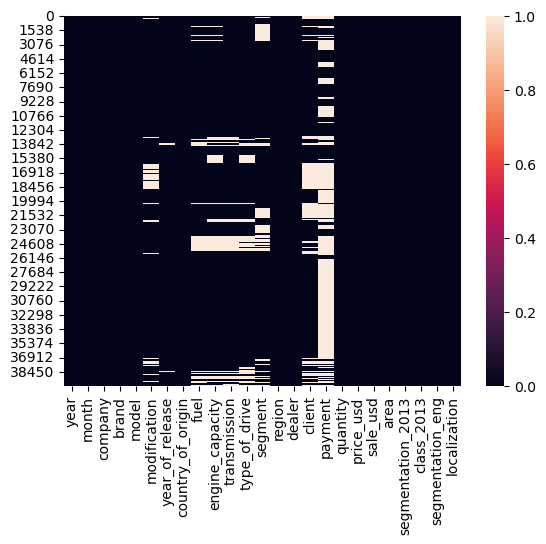

In [12]:
sns.heatmap(df.isna()); #построим хитмеп, чтобы наглядно рассмотреть как именнно распологались пропуски

Данные содержат дастаточно много пропусков. Рассмотрим пропуски в каждом столбце отдельно. Для некоторых столбцов(4) данные отсутствуют системно.

**payment**

In [13]:
df[df['payment'].isna()] #рассмотри пропуски в payment

,year,month,company,brand,model,modification,year_of_release,country_of_origin,fuel,engine_capacity,transmission,type_of_drive,segment,region,dealer,client,payment,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,segmentation_eng,localization
15,2019,Январь,Mercur Auto,Audi,A8,A8L TFSI,2018,Германия,Бензин,3,Tiptronic,quattro,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,NaN,1.0,129935.20750,129935.20750,г.Алматы,Легковые автомобили,F класс,F,Импорт
20,2019,Январь,Mercur Auto,Audi,Q5,TFSI,2017,Германия,Бензин,2,S-Tronic,quattro,Внедорожники Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,NaN,1.0,47835.59084,47835.59084,г.Алматы,Внедорожники,Среднеразмерные SUV,K2,Импорт
31,2019,Май,Автоцентр-Бавария,BMW,3 серия,330i,2019,Германия,Бензин,2,АКПП,Задний,NaN,Нур-Султан,Автоцентр-Бавария Астана,NaN,NaN,2.0,41038.50199,82077.00398,г.Нур-Султан,Легковые автомобили,D класс,D,Импорт
32,2019,Июль,Автоцентр-Бавария,BMW,3 серия,330i,2018,Германия,Бензин,2,АКП,Задний,NaN,Алматы,Автоцентр-Бавария Алматы,NaN,NaN,1.0,40635.43936,40635.43936,г.Алматы,Легковые автомобили,D класс,D,Импорт
33,2019,Январь,Автоцентр-Бавария,BMW,5 серия,530i,2018,Германия,Бензин,2,Steptronic,Задний,Легковые автомобили,Нур-Султан,Автоцентр-Бавария Астана,NaN,NaN,1.0,45118.74071,45118.74071,г.Нур-Султан,Легковые автомобили,E класс,E,Импорт
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39944,2019,Сентябрь,Renault Россия,Renault,Arkana,B32M1TX5C,2019,Российская Федерация,NaN,NaN,NaN,NaN,NaN,Уральск,Урал-Кров Авто,NaN,NaN,1.0,20889.17526,20889.17526,Западно-Казахстанская область,Внедорожники,Компактные SUV,K1,Импорт
39945,2019,Сентябрь,Renault Россия,Renault,Arkana,B32M1TX5C,2019,Российская Федерация,NaN,NaN,NaN,NaN,NaN,Атырау,Урал-Кров Авто,NaN,NaN,1.0,20889.17526,20889.17526,Атырауская область,Внедорожники,Компактные SUV,K1,Импорт
39946,2019,Сентябрь,Renault Россия,Renault,Arkana,B32M1TX5C,2019,Российская Федерация,NaN,NaN,NaN,NaN,NaN,Уральск,Урал-Кров Авто,NaN,NaN,1.0,20889.17526,20889.17526,Западно-Казахстанская область,Внедорожники,Компактные SUV,K1,Импорт
39947,2019,Сентябрь,Renault Россия,Renault,Arkana,B34M3TX5C,2019,Российская Федерация,NaN,NaN,NaN,NaN,NaN,Атырау,Урал-Кров Авто,NaN,NaN,1.0,21275.77320,21275.77320,Атырауская область,Внедорожники,Компактные SUV,K1,Импорт


In [14]:
df = df.drop(columns=['payment']) #удалим payment
df

,year,month,company,brand,model,modification,year_of_release,country_of_origin,fuel,engine_capacity,transmission,type_of_drive,segment,region,dealer,client,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,segmentation_eng,localization
0,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,1.0,28115.00000,28115.00000,г.Алматы,Легковые автомобили,C класс,C,Импорт
1,2019,Август,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,1.0,32246.99000,32246.99000,г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2019,Апрель,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-Tronic,FWD,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,1.0,32000.00000,32000.00000,г.Алматы,Легковые автомобили,D класс,D,Импорт
3,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,1.0,31929.00000,31929.00000,г.Алматы,Легковые автомобили,D класс,D,Импорт
4,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,1.0,31929.00000,31929.00000,г.Алматы,Легковые автомобили,D класс,D,Импорт
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39961,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,NaN,MT,NaN,Грузовой автомобиль,Актобе,ЗапКазКАМАЗ -Актобе,Юр. Лицо,1.0,48756.92071,48756.92071,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство
39962,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,NaN,MT,NaN,Грузовой автомобиль,Актобе,ЗапКазКАМАЗ -Актобе,Юр. Лицо,1.0,48756.92071,48756.92071,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство
39963,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,NaN,MT,NaN,Грузовой автомобиль,Актобе,ЗапКазКАМАЗ -Актобе,Юр. Лицо,1.0,48756.92071,48756.92071,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство
39964,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,NaN,MT,NaN,Грузовой автомобиль,Актобе,ЗапКазКАМАЗ -Актобе,Юр. Лицо,1.0,48756.92071,48756.92071,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство


Столбец ***payment*** с данными о форме расчета можно удалить, так как он содержит много пропусков и в нем нет особо важной для нас информация.

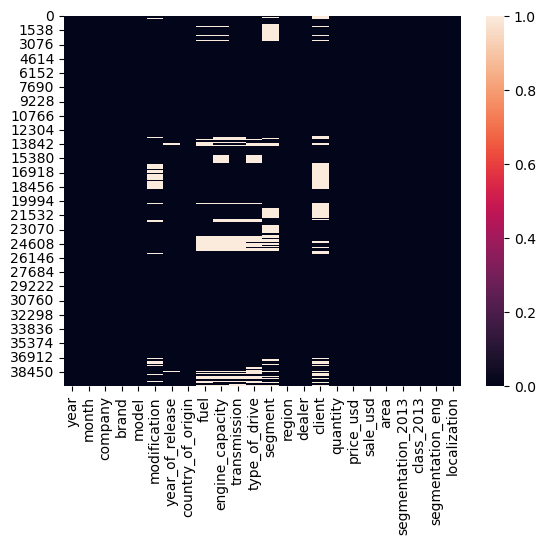

In [15]:
sns.heatmap(df.isna()); #check

**modification**

In [16]:
df[df['modification'].isna()] #пропуски modification

,year,month,company,brand,model,modification,year_of_release,country_of_origin,fuel,engine_capacity,transmission,type_of_drive,segment,region,dealer,client,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,segmentation_eng,localization
229,2019,Март,БИПЭК АВТО,Chevrolet,Aveo,NaN,2018,Республика Казахстан,Бензин,"1,596",6 АТ,Передний,B класс,Нур-Султан,БИПЭК АВТО Астана,NaN,1.0,12100.00000,12100.00000,г.Нур-Султан,Легковые автомобили,B класс,B,Локальное производство
230,2019,Март,БИПЭК АВТО,Chevrolet,Aveo,NaN,2018,Республика Казахстан,Бензин,"1,596",5 МТ,Передний,B класс,Павлодар,БИПЭК АВТО Павлодар,NaN,1.0,12100.00000,12100.00000,Павлодарская область,Легковые автомобили,B класс,B,Локальное производство
231,2019,Май,БИПЭК АВТО,Chevrolet,Aveo,NaN,2018,Республика Казахстан,Бензин,"1,596",6 АТ,Передний,B класс,Нур-Султан,БИПЭК АВТО Астана,NaN,2.0,12100.00000,24200.00000,г.Нур-Султан,Легковые автомобили,B класс,B,Локальное производство
232,2019,Май,БИПЭК АВТО,Chevrolet,Aveo,NaN,2018,Республика Казахстан,Бензин,"1,596",6 АТ,Передний,B класс,Алматы,БИПЭК АВТО Алматы,NaN,1.0,12100.00000,12100.00000,г.Алматы,Легковые автомобили,B класс,B,Локальное производство
233,2019,Май,БИПЭК АВТО,Chevrolet,Aveo,NaN,2018,Республика Казахстан,Бензин,"1,596",5 МТ,Передний,B класс,Алматы,БИПЭК АВТО Алматы,NaN,1.0,12100.00000,12100.00000,г.Алматы,Легковые автомобили,B класс,B,Локальное производство
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39554,2019,Июнь,Hyundai Com Trans Kazakhstan,Hyundai Truck & Bus,EX8,NaN,NaN,Республика Казахстан,NaN,NaN,NaN,NaN,Изотермический фургон 5900*2200*2200 Стандарт,Алматы,Hyundai Auto Almaty,Юр. Лицо,1.0,34590.76936,34590.76936,г.Алматы,Коммерческие автомобили,Малотоннажные грузовики,N,Локальное производство
39555,2019,Июнь,Hyundai Com Trans Kazakhstan,Hyundai Truck & Bus,EX8,NaN,NaN,Республика Казахстан,NaN,NaN,NaN,NaN,Шасси,Алматы,Hyundai Auto Almaty,Юр. Лицо,1.0,34590.76936,34590.76936,г.Алматы,Коммерческие автомобили,Малотоннажные грузовики,N,Локальное производство
39556,2019,Июнь,Hyundai Com Trans Kazakhstan,Hyundai Truck & Bus,EX8,NaN,NaN,Республика Казахстан,NaN,NaN,NaN,NaN,Изотермический фургон 5900*2200*2200 Премиум,Алматы,Hyundai Auto Almaty,Юр. Лицо,1.0,34590.76936,34590.76936,г.Алматы,Коммерческие автомобили,Малотоннажные грузовики,N,Локальное производство
39558,2019,Сентябрь,Hyundai Com Trans Kazakhstan,Hyundai Truck & Bus,EX8,NaN,2019,Республика Казахстан,NaN,NaN,NaN,NaN,Шасси,Алматы,Hyundai Auto Almaty,NaN,1.0,34139.88420,34139.88420,г.Алматы,Коммерческие автомобили,Малотоннажные грузовики,N,Локальное производство


In [17]:
df = df.drop(columns='modification')

Удалим. Столбец ***modification*** содержит пропуски и бесполезен для анализа и информации из стобца ***model*** будет достаточно.

**segment**

In [18]:
df = df.drop(columns=['segment'])

Столбец не нужен для анализа и содержит много пропусков, так как есть более актуальная информация в столбце segmentation_2013

**client**

In [19]:
df = df.drop(columns=['client'])

Столбец ***client*** содержит данные о типе клиента (юридическое или физическое лицо). Удалим, так как очень много пропусков.

**fuel, engine_capacity, transmission, type_of_drive**

Для 4 столбцов ***fuel, engine_capacity, transmission, type_of_drive*** пока что заполним пропуски заглушкой 'unknown', а ниже рассмотрим эти столбцы отдельно и попытаемся максимально восстановить данные

In [20]:
df[['fuel','engine_capacity', 'transmission', 'type_of_drive']] = df[['fuel','engine_capacity', 'transmission', 'type_of_drive']].fillna('unknown')

In [21]:
df.isna().sum() #проверка пропусков в данных

year                   0
month                  0
company                0
brand                  0
model                  0
year_of_release      501
country_of_origin      0
fuel                   0
engine_capacity        0
transmission           0
type_of_drive          0
region                 0
dealer                 0
quantity               6
price_usd              0
sale_usd               0
area                   0
segmentation_2013      0
class_2013             0
segmentation_eng       0
localization           0
dtype: int64

**engine_capacity**

### Рассмотрим неявные дубликаты

In [22]:
df['engine_capacity'].unique()

array(['1,4', '2', '3', '4,4', '6,6', '1,5', '1,596', '2,4', '1,7',
       '26,7', '25,7', '24,7', '23,7', '22,7', '21,7', '20,7', '19,7',
       '18,7', '17,7', '16,7', '15,7', '14,7', '13,7', '12,7', '11,7',
       '10,7', '9,7', '8,7', '7,7', '6,7', '5,7', '4,7', '3,7', '2,7',
       '6,2', '1,4 Turbo', '2,5', '1,6', 'unknown', '2,8', '4,3', '4,3,',
       '1,6 MPI', '2,0 MPI', '2,4 GDI', '2,4 MPI', '2,5 CRDI VGT',
       '2,5 CRDI WGT', '3,9', '7,5', '12,3', '1,6 T-GDI', '2,0 CRDI',
       '2.0', '3,5', '5,6', '5,2', '3,0 L', '1.6', '1.5', '5', '1,598',
       '1,248', '1,998', '2,359', '1,999', '3,342', '1,591', '3,47',
       '1,69', '1,774', '2.5', '2.7 ', '3.5', '2.7', '4.6', '4,6', '5.7',
       '1,8', '10,5', '4', '5,5', '12', '12,8', '11', '2,2', '1,2',
       '1,485', 'MT', 'AT', '0', '13', '1,33', '#Н/Д', '4.0', '2.4G',
       '2,4G', '2.8', '2,693', '2,0', '3,8', '3.8', '1,2T', '3,6', '7,6',
       '4,9', '2.0h', '2,9', '400 Л.С.', '4,98 L,', '4,98', '88 KWH',
       '8,4

In [23]:
df.loc[df['engine_capacity'] == '88 KWH', 'engine_capacity'] = '88'#мощьность двигателя для электромобиля

In [24]:
df.loc[df['engine_capacity'] == '#Н/Д', 'engine_capacity'] = 'unknown'

In [25]:
df.loc[df['engine_capacity'] == '400 Л.С.', 'engine_capacity'] = '90' #мощьность двигателя для электромобиля

Всю доп инфу об автомобилях тут и далее брал с  https://www.drom.ru/catalog/

In [26]:
df.loc[df['engine_capacity'] == '0', 'engine_capacity'] = '1.6'

Рассмотрев все значения с объемом двигателя = около 20 литров можно увидеть Chevrolet Niva. Заменяем на правильный объем

In [27]:
df.loc[df['model'] == 'Niva']

,year,month,company,brand,model,year_of_release,country_of_origin,fuel,engine_capacity,transmission,type_of_drive,region,dealer,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,segmentation_eng,localization
264,2019,Январь,Вираж,Chevrolet,Niva,2017,Российская Федерация,Бензин,"1,7",MT,4WD,Алматы,Вираж Алматы,1.0,10568.75844,10568.75844,г.Алматы,Внедорожники,Субкомпактные SUV,K1,Импорт
265,2019,Январь,Вираж,Chevrolet,Niva,2018,Республика Казахстан,Бензин,"1,7",MT,4WD,Кокшетау,Вираж Кокшетау,1.0,10568.75844,10568.75844,Акмолинская область,Внедорожники,Субкомпактные SUV,K1,Локальное производство
266,2019,Январь,Вираж,Chevrolet,Niva,2018,Республика Казахстан,Бензин,"1,7",MT,4WD,Уральск,Вираж Уральск,1.0,10568.75844,10568.75844,Западно-Казахстанская область,Внедорожники,Субкомпактные SUV,K1,Локальное производство
267,2019,Январь,Вираж,Chevrolet,Niva,2018,Республика Казахстан,Бензин,"1,7",MT,4WD,Уральск,Вираж Уральск,1.0,10568.75844,10568.75844,Западно-Казахстанская область,Внедорожники,Субкомпактные SUV,K1,Локальное производство
268,2019,Январь,Вираж,Chevrolet,Niva,2018,Республика Казахстан,Бензин,"1,7",MT,4WD,Петропавловск,Вираж Петропавловск,1.0,10568.75844,10568.75844,Северо-Казахстанская область,Внедорожники,Субкомпактные SUV,K1,Локальное производство
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,2019,Сентябрь,Вираж,Chevrolet,Niva,2019,Республика Казахстан,Бензин,"1,7",MT,4WD,Кызылорда,Вираж Кызылорда,1.0,10331.65144,10331.65144,Кызылординская область,Внедорожники,Субкомпактные SUV,K1,Локальное производство
827,2019,Сентябрь,Вираж,Chevrolet,Niva,2019,Республика Казахстан,Бензин,"1,7",MT,4WD,Караганда,Вираж Караганда,1.0,10331.65144,10331.65144,Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Локальное производство
828,2019,Сентябрь,Вираж,Chevrolet,Niva,2019,Республика Казахстан,Бензин,"1,7",MT,4WD,Актобе,Вираж Актобе,1.0,10331.65144,10331.65144,Актюбинская область,Внедорожники,Субкомпактные SUV,K1,Локальное производство
829,2019,Сентябрь,Вираж,Chevrolet,Niva,2019,Республика Казахстан,Бензин,"1,7",MT,4WD,Уральск,Вираж Уральск,1.0,10331.65144,10331.65144,Западно-Казахстанская область,Внедорожники,Субкомпактные SUV,K1,Локальное производство


In [28]:
df.loc[df['model'] == 'Niva', 'engine_capacity'] = '1.7'

Значения для Renault Duster и Sandero были перепутаны между столбцами. Заменяем

In [29]:
df.loc[df['engine_capacity'] == 'MT']

,year,month,company,brand,model,year_of_release,country_of_origin,fuel,engine_capacity,transmission,type_of_drive,region,dealer,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,segmentation_eng,localization
23723,2019,Январь,Renault Россия,Renault,Duster,2019,Российская Федерация,2,MT,4WD,4WD,Уральск,Урал-Кров Авто,1.0,12249.61125,12249.61125,Западно-Казахстанская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23727,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,2,MT,4WD,4WD,Караганда,Кристалл Авто Караганда,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23728,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,"1,6",MT,4WD,4WD,Караганда,Кристалл Авто Караганда,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23731,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,2,MT,4WD,4WD,Караганда,Кристалл Авто Караганда,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23732,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,2,MT,4WD,4WD,Караганда,Кристалл Авто Караганда,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23733,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,"1,6",MT,4WD,4WD,Караганда,Кристалл Авто Караганда,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23747,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,2,MT,4WD,4WD,Усть-Каменогорск,БИПЭК АВТО Усть-Каменогорск,1.0,12249.61125,12249.61125,Восточно-Казахстанская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23754,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,"1,6",MT,4WD,4WD,Алматы,ASTER AUTO Алматы,1.0,12249.61125,12249.61125,г.Алматы,Внедорожники,Субкомпактные SUV,K1,Импорт
23755,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,2,MT,4WD,4WD,Алматы,ASTER AUTO Алматы,1.0,12249.61125,12249.61125,г.Алматы,Внедорожники,Субкомпактные SUV,K1,Импорт
23763,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,"1,6",MT,4WD,4WD,Нур-Султан,Автоцентр Астэк,1.0,12249.61125,12249.61125,г.Нур-Султан,Внедорожники,Субкомпактные SUV,K1,Импорт


In [30]:
df.loc[df['engine_capacity'] == 'MT', 'engine_capacity'] = df.loc[df['engine_capacity'] == 'MT', 'fuel']

In [31]:
df.loc[df['engine_capacity'] == 'AT']

,year,month,company,brand,model,year_of_release,country_of_origin,fuel,engine_capacity,transmission,type_of_drive,region,dealer,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,segmentation_eng,localization
23724,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,2,AT,4WD,4WD,Нур-Султан,Кристалл Авто Астана,1.0,12249.61125,12249.61125,г.Нур-Султан,Внедорожники,Субкомпактные SUV,K1,Импорт
23725,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,2,AT,4WD,4WD,Нур-Султан,Кристалл Авто Астана,1.0,12249.61125,12249.61125,г.Нур-Султан,Внедорожники,Субкомпактные SUV,K1,Импорт
23726,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,2,AT,4WD,4WD,Кызылорда,Кристалл Авто Кызылорда,1.0,12249.61125,12249.61125,Кызылординская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23729,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,2,AT,4WD,4WD,Караганда,Кристалл Авто Караганда,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23730,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,2,AT,4WD,4WD,Караганда,Кристалл Авто Караганда,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23734,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,"1,6",AT,Передний,Передний,Караганда,Кристалл Авто Караганда,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23735,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,"1,6",AT,Передний,Передний,Караганда,Кристалл Авто Караганда,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23736,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,"1,6",AT,Передний,Передний,Караганда,Кристалл Авто Караганда,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23746,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,2,AT,4WD,4WD,Усть-Каменогорск,БИПЭК АВТО Усть-Каменогорск,1.0,12249.61125,12249.61125,Восточно-Казахстанская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23748,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,2,AT,4WD,4WD,Шымкент,БИПЭК АВТО Шымкент,1.0,12249.61125,12249.61125,Южно-Казахстанская область,Внедорожники,Субкомпактные SUV,K1,Импорт


In [32]:
df.loc[df['engine_capacity'] == 'AT', 'engine_capacity'] = df.loc[df['engine_capacity'] == 'AT', 'fuel']

In [33]:
df.loc[df['engine_capacity'] == 'unknown', 'engine_capacity'] = '0' #заменим unknown на 0 для пропусков, чтобы сменить тип данных

Избавимся от всех ненужных надписей и оставим только цифры объема двигателя

In [34]:
#поменяем "," на "." и отрежем все значения больше трех знаков
df['engine_capacity'] = df['engine_capacity'].str[:3].str.replace(',', '.')

In [35]:
#вернем значениям с 4 знаками недостающу
df.loc[df['model'] == 'Universe', 'engine_capacity'] = '12.3'
df.loc[df['model'] == 'Actros', 'engine_capacity'] = '12.8'
df.loc[df['model'] == 'TG', 'engine_capacity'] = '10.5'

In [36]:
df['engine_capacity'] = df['engine_capacity'].astype(float) #поменяем тип данных

In [37]:
df['engine_capacity'].unique() #check

array([ 1.4,  2. ,  3. ,  4.4,  6.6,  1.5,  2.4,  1.7,  6.2,  2.5,  1.6,
        0. ,  2.7,  2.8,  4.3,  3.9,  7.5, 12.3,  3.5,  5.6,  8.7,  5.2,
        5. ,  1.2,  1.9,  2.3,  3.3,  3.4,  4.6,  5.7,  1.8, 10.5,  4. ,
        5.5, 12.8,  2.2, 12. , 13. ,  1.3,  2.6,  3.8,  3.6,  7.6,  4.9,
        2.9, 90. , 88. ,  8.4,  6.7,  6.5])

In [38]:
df.info() #check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               39966 non-null  int64  
 1   month              39966 non-null  object 
 2   company            39966 non-null  object 
 3   brand              39966 non-null  object 
 4   model              39966 non-null  object 
 5   year_of_release    39465 non-null  object 
 6   country_of_origin  39966 non-null  object 
 7   fuel               39966 non-null  object 
 8   engine_capacity    39966 non-null  float64
 9   transmission       39966 non-null  object 
 10  type_of_drive      39966 non-null  object 
 11  region             39966 non-null  object 
 12  dealer             39966 non-null  object 
 13  quantity           39960 non-null  float64
 14  price_usd          39966 non-null  float64
 15  sale_usd           39966 non-null  float64
 16  area               399

**fuel**

Рассмотрим неявные дубликаты

In [39]:
df['fuel'].unique()

array(['Бензин', 'Дизель', 'unknown', 'дизель ', 'бензин ', 'гибрид', '2',
       '1,6', '0', 'Электро', 'Электричество'], dtype=object)

In [40]:
df.loc[df['fuel'] == 'Электро']

,year,month,company,brand,model,year_of_release,country_of_origin,fuel,engine_capacity,transmission,type_of_drive,region,dealer,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,segmentation_eng,localization
39544,2019,Февраль,Almaty Motors Premium,Jaguar,I-Pace,2019,UK,Электро,90.0,РЕДУКТОР,4WD,Алматы,Almaty Motors Premium,1.0,117236.9729,117236.9729,г.Алматы,Внедорожники,Компактные SUV,K1,Импорт
39545,2019,Апрель,Almaty Motors Premium,Jaguar,I-Pace,2019,UK,Электро,90.0,РЕДУКТОР,4WD,Алматы,Almaty Motors Premium,1.0,105388.7924,105388.7924,г.Алматы,Внедорожники,Компактные SUV,K1,Импорт
39546,2019,Июнь,Almaty Motors Premium,Jaguar,I-Pace,2019,UK,Электро,90.0,РЕДУКТОР,4WD,Алматы,Almaty Motors Premium,1.0,120413.2793,120413.2793,г.Алматы,Внедорожники,Компактные SUV,K1,Импорт


In [41]:
df.loc[df['fuel'] == '0']

,year,month,company,brand,model,year_of_release,country_of_origin,fuel,engine_capacity,transmission,type_of_drive,region,dealer,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,segmentation_eng,localization
37121,2019,Январь,БИПЭК АВТО,UAZ,3741,2018,Республика Казахстан,0,2.6,5 МТ,Полный,Талдыкорган,БИПЭК АВТО Талдыкорган,1.0,14200.0,14200.0,Алматинская область,Коммерческие автомобили,Малотоннажные грузовики,N,Локальное производство
37122,2019,Январь,БИПЭК АВТО,UAZ,3741,2018,Республика Казахстан,0,2.6,5 МТ,Полный,Актобе,БИПЭК АВТО Актобе,3.0,14200.0,42600.0,Актюбинская область,Коммерческие автомобили,Малотоннажные грузовики,N,Локальное производство
37123,2019,Январь,БИПЭК АВТО,UAZ,3741,2018,Республика Казахстан,0,2.6,5 МТ,Полный,Актау,БИПЭК АВТО Актау,2.0,14200.0,28400.0,Мангистауская область,Коммерческие автомобили,Малотоннажные грузовики,N,Локальное производство


In [42]:
df.loc[df['fuel'] == '2']

,year,month,company,brand,model,year_of_release,country_of_origin,fuel,engine_capacity,transmission,type_of_drive,region,dealer,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,segmentation_eng,localization
23723,2019,Январь,Renault Россия,Renault,Duster,2019,Российская Федерация,2,2.0,4WD,4WD,Уральск,Урал-Кров Авто,1.0,12249.61125,12249.61125,Западно-Казахстанская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23724,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,2,2.0,4WD,4WD,Нур-Султан,Кристалл Авто Астана,1.0,12249.61125,12249.61125,г.Нур-Султан,Внедорожники,Субкомпактные SUV,K1,Импорт
23725,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,2,2.0,4WD,4WD,Нур-Султан,Кристалл Авто Астана,1.0,12249.61125,12249.61125,г.Нур-Султан,Внедорожники,Субкомпактные SUV,K1,Импорт
23726,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,2,2.0,4WD,4WD,Кызылорда,Кристалл Авто Кызылорда,1.0,12249.61125,12249.61125,Кызылординская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23727,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,2,2.0,4WD,4WD,Караганда,Кристалл Авто Караганда,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23729,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,2,2.0,4WD,4WD,Караганда,Кристалл Авто Караганда,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23730,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,2,2.0,4WD,4WD,Караганда,Кристалл Авто Караганда,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23731,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,2,2.0,4WD,4WD,Караганда,Кристалл Авто Караганда,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23732,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,2,2.0,4WD,4WD,Караганда,Кристалл Авто Караганда,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23746,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,2,2.0,4WD,4WD,Усть-Каменогорск,БИПЭК АВТО Усть-Каменогорск,1.0,12249.61125,12249.61125,Восточно-Казахстанская область,Внедорожники,Субкомпактные SUV,K1,Импорт


In [43]:
df.loc[df['fuel'] == '1,6']

,year,month,company,brand,model,year_of_release,country_of_origin,fuel,engine_capacity,transmission,type_of_drive,region,dealer,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,segmentation_eng,localization
23728,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,"1,6",1.6,4WD,4WD,Караганда,Кристалл Авто Караганда,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23733,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,"1,6",1.6,4WD,4WD,Караганда,Кристалл Авто Караганда,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23734,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,"1,6",1.6,Передний,Передний,Караганда,Кристалл Авто Караганда,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23735,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,"1,6",1.6,Передний,Передний,Караганда,Кристалл Авто Караганда,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23736,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,"1,6",1.6,Передний,Передний,Караганда,Кристалл Авто Караганда,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23751,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,"1,6",1.6,Передний,Передний,Усть-Каменогорск,БИПЭК АВТО Усть-Каменогорск,1.0,12249.61125,12249.61125,Восточно-Казахстанская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23754,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,"1,6",1.6,4WD,4WD,Алматы,ASTER AUTO Алматы,1.0,12249.61125,12249.61125,г.Алматы,Внедорожники,Субкомпактные SUV,K1,Импорт
23763,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,"1,6",1.6,4WD,4WD,Нур-Султан,Автоцентр Астэк,1.0,12249.61125,12249.61125,г.Нур-Султан,Внедорожники,Субкомпактные SUV,K1,Импорт
23764,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,"1,6",1.6,4WD,4WD,Петропавловск,Автоцентр Астэк,1.0,12249.61125,12249.61125,Северо-Казахстанская область,Внедорожники,Субкомпактные SUV,K1,Импорт
24997,2019,Январь,Renault Россия,Renault,Sandero,2018,Российская Федерация,"1,6",1.6,0,0,Атырау,Урал-Кров Авто,1.0,12476.89637,12476.89637,Атырауская область,Легковые автомобили,B класс,B,Импорт


Вновь перепутаны значения в столбцах для Renault, а также других моделей. Исправим значения для каждого типа топлива проверив их в интернете.

In [44]:
for fuel in df['fuel']:
    if fuel in ['Бензин', 'бензин ', '2', '1,6', '0']:
        df['fuel'] = df['fuel'].replace(fuel, 'F')

In [45]:
for fuel in df['fuel']:
    if fuel in ['Дизель', 'дизель ']:
        df['fuel'] = df['fuel'].replace(fuel, 'D')

In [46]:
for fuel in df['fuel']:
    if fuel in ['Электро', 'Электричество']:
        df['fuel'] = df['fuel'].replace(fuel, 'E')

In [47]:
df.loc[df['fuel'] == 'гибрид', 'fuel'] = 'HYB'

Кодируем тип топлива в F - бензин, D - дизель, E - электричество, HYB - гибрид

In [48]:
df['fuel'].unique()

array(['F', 'D', 'unknown', 'HYB', 'E'], dtype=object)

In [49]:
df['fuel'] = df['fuel'].astype('category') #сменим тип данных на category

**type_of_drive**

Рассмотрим неявные дубликаты

In [50]:
df['type_of_drive'].unique()

array(['передний', 'FWD', 'quattro', 'Задний', 'Полный', 'AWD',
       'Передний', '4WD', '4х2.2', 'unknown', 'RWD', '2 WD', '2WD',
       '4 WD', '4X4', '4х4', '4x4', '4x2', '4х2', '4X2', 'Астана',
       'Передний (FF)', '0', 'FF', '#Н/Д', 'полный', '4Motion'],
      dtype=object)

Кодируем тип привода: RWD – задний привод, FWD – передний привод,
4WD – полный привод, 2WD – подключаемый полный привод и unknown для неизвестных

In [51]:
for i in df['type_of_drive']:
    if i in ['RWD', 'Задний', 'Астана']:
        df['type_of_drive'] = df['type_of_drive'].replace(i, 'RWD')

In [52]:
for i in df['type_of_drive']:
    if i in ['передний', 'FWD', 'Передний', 'Передний (FF)', 'FF']:
        df['type_of_drive'] = df['type_of_drive'].replace(i, 'FWD')

In [53]:
for i in df['type_of_drive']:
    if i in ['4WD', 'quattro', 'Полный', 'полный', 'AWD', '4 WD', '4Motion', '4X4', '4х4', '4x4']:
        df['type_of_drive'] = df['type_of_drive'].replace(i, '4WD')

In [54]:
for i in df['type_of_drive']:
    if i in ['4х2.2', '2 WD', '2WD', '4X2', '4x2', '4х2']:
        df['type_of_drive'] = df['type_of_drive'].replace(i, '2WD')

In [55]:
df.loc[df['type_of_drive'] == '#Н/Д', 'type_of_drive'] = 'unknown'
df.loc[df['type_of_drive'] == '0', 'type_of_drive'] = 'unknown'

In [56]:
df['type_of_drive'].unique() #check

array(['FWD', '4WD', 'RWD', '2WD', 'unknown'], dtype=object)

In [57]:
df['type_of_drive'] = df['type_of_drive'].astype('category') #сменим тип данных на category

**transmission**

Рассмотрим неявные дубликаты

In [58]:
df['transmission'].unique()

array(['S-tronic', 'S-Tronic', 'Tiptronic', 'АКПП', 'АКП', 'Steptronic',
       'AT', '6 АТ', '5 МТ', '6АТ', 'MT', '8AT', '5МТ', 'Powershift S6',
       '6AT', 'unknown', 'Мех.', '6 AT', '6 MT', '6MT', '5 AT', '5AT',
       'МКПП', '7 DCT', '7DCT', '8 AT', 'МТ', 'CVT', 'DCT', '4 АТ',
       '6 МТ', '6МТ', '4АТ', '4AT', '8АТ', '8 АТ', '5MT', 'AMT',
       'CVT (вариатор)', 'CVT (вариATор)', 'CVT(вAриATор)', '7G-TRONIC',
       '9G-TRONIC', '12AT', '12АТ', '5АТ', '7АТ', '7AT', '6M/T', 'PDK',
       '8-ступ АКПП', '8', '8АКПП', '8 АКПП Tiptronic S', '7 АКПП (PDK)',
       '7 АКПП PDK', '8 АКПП (PDK)', 'АТ', 'АT', 'МT', '4WD', 'Передний',
       '0', '7 DSG', '7DSG', '6 DSG', '6DSG', '#Н/Д', 'DSG', '6A', '6А',
       '5M', 'A/T', 'M/T', 'МКП', '5М', 'М/T', ' 7 АКП', '7АКП', 'А/T',
       '8A', 'TDI', '9AT', 'РЕДУКТОР'], dtype=object)

Кодируем тип коробки переключения передач: автоматическая АТ, механическая MT и unknown для неизвестного. Рассмотрим и определим к чему относятся DSG, S-Tronic и прочее

In [59]:
for i in df['transmission']:
    if i in ['АКПП', 'АКП', 'Steptronic', 'AT', '6 АТ', '6АТ',
       '8AT', 'Powershift S6', '6AT', '6 AT',
       '5 AT', '5AT', '7 DCT', '7DCT', '8 AT',
       'CVT', 'DCT', '4 АТ', '4АТ', '4AT', '8АТ',
       '8 АТ', 'AMT', 'CVT (вариатор)', 'CVT (вариATор)',
       'CVT(вAриATор)', '7G-TRONIC', '9G-TRONIC', '12AT', '12АТ', '5АТ',
       '7АТ', '7AT', 'PDK', '8-ступ АКПП', '8', '8АКПП',
       '8 АКПП Tiptronic S', '7 АКПП (PDK)', '7 АКПП PDK', '8 АКПП (PDK)',
       'АТ', 'АT', '6A', '6А', 'A/T', ' 7 АКП', '7АКП',
       'А/T', '8A', '9AT', 'S-tronic', 'S-Tronic', 'Tiptronic', 'РЕДУКТОР']:
        df['transmission'] = df['transmission'].replace(i, 'AT')

In [60]:
for i in df['transmission']:
    if i in ['5 МТ', 'MT', '5МТ', 'Мех.', '6 MT', '6MT',
       'МКПП', 'МТ', '6 МТ', '6МТ', '5MT', '6M/T', 'МT',
       '7 DSG', '7DSG', '6 DSG', '6DSG', 'DSG',
       '5M', 'M/T', 'МКП', '5М', 'М/T', 'TDI']:
        df['transmission'] = df['transmission'].replace(i, 'MT')

In [61]:
df['transmission'].unique() #check

array(['AT', 'MT', 'unknown', '4WD', 'Передний', '0', '#Н/Д'],
      dtype=object)

Рассмотрим остальные типы коробки передач

In [62]:
df.loc[df['transmission'] == '#Н/Д', 'transmission'] = 'unknown'
df.loc[df['transmission'] == '0', 'transmission'] = 'unknown'

Вновь перепутаны данные для Renault

In [63]:
df.loc[df['transmission'] == 'Передний'] #все механика

,year,month,company,brand,model,year_of_release,country_of_origin,fuel,engine_capacity,transmission,type_of_drive,region,dealer,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,segmentation_eng,localization
23734,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,F,1.6,Передний,FWD,Караганда,Кристалл Авто Караганда,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23735,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,F,1.6,Передний,FWD,Караганда,Кристалл Авто Караганда,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23736,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,F,1.6,Передний,FWD,Караганда,Кристалл Авто Караганда,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23751,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,F,1.6,Передний,FWD,Усть-Каменогорск,БИПЭК АВТО Усть-Каменогорск,1.0,12249.61125,12249.61125,Восточно-Казахстанская область,Внедорожники,Субкомпактные SUV,K1,Импорт
24998,2019,Январь,Renault Россия,Renault,Sandero,2018,Российская Федерация,F,1.6,Передний,FWD,Уральск,Урал-Кров Авто,1.0,12476.89637,12476.89637,Западно-Казахстанская область,Легковые автомобили,B класс,B,Импорт
24999,2019,Январь,Renault Россия,Renault,Sandero,2018,Российская Федерация,F,1.6,Передний,FWD,Уральск,Урал-Кров Авто,1.0,12476.89637,12476.89637,Западно-Казахстанская область,Легковые автомобили,B класс,B,Импорт


In [64]:
df.loc[df['transmission'] == 'Передний', 'transmission'] = 'MT' #все механика

Опять перепутаны данные для Renault

In [65]:
df.loc[df['transmission'] == '4WD']

,year,month,company,brand,model,year_of_release,country_of_origin,fuel,engine_capacity,transmission,type_of_drive,region,dealer,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,segmentation_eng,localization
23723,2019,Январь,Renault Россия,Renault,Duster,2019,Российская Федерация,F,2.0,4WD,4WD,Уральск,Урал-Кров Авто,1.0,12249.61125,12249.61125,Западно-Казахстанская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23724,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,F,2.0,4WD,4WD,Нур-Султан,Кристалл Авто Астана,1.0,12249.61125,12249.61125,г.Нур-Султан,Внедорожники,Субкомпактные SUV,K1,Импорт
23725,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,F,2.0,4WD,4WD,Нур-Султан,Кристалл Авто Астана,1.0,12249.61125,12249.61125,г.Нур-Султан,Внедорожники,Субкомпактные SUV,K1,Импорт
23726,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,F,2.0,4WD,4WD,Кызылорда,Кристалл Авто Кызылорда,1.0,12249.61125,12249.61125,Кызылординская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23727,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,F,2.0,4WD,4WD,Караганда,Кристалл Авто Караганда,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23728,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,F,1.6,4WD,4WD,Караганда,Кристалл Авто Караганда,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23729,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,F,2.0,4WD,4WD,Караганда,Кристалл Авто Караганда,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23730,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,F,2.0,4WD,4WD,Караганда,Кристалл Авто Караганда,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23731,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,F,2.0,4WD,4WD,Караганда,Кристалл Авто Караганда,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23732,2019,Январь,Renault Россия,Renault,Duster,2018,Российская Федерация,F,2.0,4WD,4WD,Караганда,Кристалл Авто Караганда,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт


In [66]:
#для объема двигателя в 2.0 и 4WD 'AT'
df.loc[(df['transmission'] == '4WD') & (df['engine_capacity'] == 2), 'transmission'] = 'AT'

In [67]:
#для объема двигателя в 1.6 и 4WD 'MT'
df.loc[(df['transmission'] == '4WD') & (df['engine_capacity'] == 1.6), 'transmission'] = 'MT'

In [68]:
df['transmission'].unique() #check

array(['AT', 'MT', 'unknown'], dtype=object)

In [69]:
df['transmission'] = df['transmission'].astype('category') #сменим тип данных на category

**month, year**

Объеденим столбцы year и month и преведем и к формату datetime

In [70]:
#создадим новую переменную new_month
df['new_month'] = 0
#переименуем названия месяцев
def map_month_to_number(month_name):
    month_mapping = {
        'Январь': 'January', 'Февраль': 'February', 'Март': 'March', 'Апрель': 'April',
        'Май': 'May', 'Июнь': 'June', 'Июль': 'July', 'Август': 'August',
        'Сентябрь': 'September', 'Октябрь': 'October', 'Ноябрь': 'November', 'Декабрь': 'December'
    }
    return month_mapping.get(month_name, 0)  #Возвращаем 0 для неизвестных месяцев

In [71]:
df['new_month'] = df['month'].apply(map_month_to_number) #применим функцию к столбцу month

In [72]:
df['new_month'] = (df['new_month'] + ' 1') #добавим 1, чтобы добавить день в который совершается сделка для соблюдения формата
df['year'] = df['year'].astype('str') #сменим тип данных в столбце на str, чтобы
df['date'] = df['year'] +  ' ' + df['new_month'] #складываем строки из получаем дату в нужно формате

In [73]:
df['date'] = pd.to_datetime(df['date'], format='%Y %B %d') # Преобразование столбца 'date' в тип datetime

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   year               39966 non-null  object        
 1   month              39966 non-null  object        
 2   company            39966 non-null  object        
 3   brand              39966 non-null  object        
 4   model              39966 non-null  object        
 5   year_of_release    39465 non-null  object        
 6   country_of_origin  39966 non-null  object        
 7   fuel               39966 non-null  category      
 8   engine_capacity    39966 non-null  float64       
 9   transmission       39966 non-null  category      
 10  type_of_drive      39966 non-null  category      
 11  region             39966 non-null  object        
 12  dealer             39966 non-null  object        
 13  quantity           39960 non-null  float64       
 14  price_

In [75]:
df = df.drop(columns=['year', 'month', 'new_month']) #удалим ненужные столбцы
df

,company,brand,model,year_of_release,country_of_origin,fuel,engine_capacity,transmission,type_of_drive,region,dealer,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,segmentation_eng,localization,date
0,Mercur Auto,Audi,A3,2018,Германия,F,1.4,AT,FWD,Алматы,Mercur Auto Алматы,1.0,28115.00000,28115.00000,г.Алматы,Легковые автомобили,C класс,C,Импорт,2019-05-01
1,Mercur Auto,Audi,A3,2018,Германия,F,1.4,AT,FWD,Алматы,Mercur Auto Алматы,1.0,32246.99000,32246.99000,г.Алматы,Легковые автомобили,C класс,C,Импорт,2019-08-01
2,Mercur Auto,Audi,A4,2018,Германия,F,1.4,AT,FWD,Алматы,Mercur Auto Алматы,1.0,32000.00000,32000.00000,г.Алматы,Легковые автомобили,D класс,D,Импорт,2019-04-01
3,Mercur Auto,Audi,A4,2018,Германия,F,1.4,AT,FWD,Алматы,Mercur Auto Алматы,1.0,31929.00000,31929.00000,г.Алматы,Легковые автомобили,D класс,D,Импорт,2019-07-01
4,Mercur Auto,Audi,A4,2018,Германия,F,1.4,AT,FWD,Алматы,Mercur Auto Алматы,1.0,31929.00000,31929.00000,г.Алматы,Легковые автомобили,D класс,D,Импорт,2019-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39961,ТК КАМАЗ,KAMAZ,58815Z,2019,Республика Казахстан,D,0.0,MT,unknown,Актобе,ЗапКазКАМАЗ -Актобе,1.0,48756.92071,48756.92071,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство,2019-09-01
39962,ТК КАМАЗ,KAMAZ,58815Z,2019,Республика Казахстан,D,0.0,MT,unknown,Актобе,ЗапКазКАМАЗ -Актобе,1.0,48756.92071,48756.92071,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство,2019-09-01
39963,ТК КАМАЗ,KAMAZ,58815Z,2019,Республика Казахстан,D,0.0,MT,unknown,Актобе,ЗапКазКАМАЗ -Актобе,1.0,48756.92071,48756.92071,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство,2019-09-01
39964,ТК КАМАЗ,KAMAZ,58815Z,2019,Республика Казахстан,D,0.0,MT,unknown,Актобе,ЗапКазКАМАЗ -Актобе,1.0,48756.92071,48756.92071,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство,2019-09-01


**country_of_origin и код страны alpha3**

Рассмотрим неявные дубликаты

In [76]:
df['country_of_origin'].unique()

array(['Германия', 'США', 'Австрия', 'Республика Казахстан',
       'Российская Федерация', 'Корея', 'Япония', 'Таиланд', 'Китай',
       'UK', 'Узбекистан', 'Венгрия', 'Турция', 'Испания', 'Нидерланды',
       'Польша', 'Швеция', 'Белоруссия', 'Бельгия'], dtype=object)

Переименуем страны на английский для того, чтобы использовать alpha-3, так как на русском не сработало.

In [77]:
#создадим новую переменную new_month
df['country'] = df['country_of_origin']
#переименуем названия стран
def map_country_to_country(country):
    country_mapping = {
        'Германия': 'Germany', 'США': 'USA', 'Австрия': 'Austria', 'Республика Казахстан': 'Kazakhstan',
        'Российская Федерация': 'Russia', 'Корея': 'Korea', 'Япония': 'Japan', 'Таиланд': 'Thailand','Китай':'China',
        'Узбекистан': 'Uzbekistan', 'Венгрия': 'Hungary', 'Турция': 'Turkey', 'Испания': 'Spain',
        'Нидерланды': 'Netherlands', 'Польша': 'Poland', 'Швеция': 'Sweden', 'Белоруссия': 'Belarus', 'Бельгия': 'Belgium', 'UK':'UK'
    }
    return country_mapping.get(country, 0)  # Возвращаем 0 для неизвестных

In [78]:
df['country'] = df['country_of_origin'].apply(map_country_to_country)

In [79]:
df['country'].unique() #check

array(['Germany', 'USA', 'Austria', 'Kazakhstan', 'Russia', 'Korea',
       'Japan', 'Thailand', 'China', 'UK', 'Uzbekistan', 'Hungary',
       'Turkey', 'Spain', 'Netherlands', 'Poland', 'Sweden', 'Belarus',
       'Belgium'], dtype=object)

In [80]:
df = df.drop(columns=['country_of_origin'])

In [81]:
# Функция для получения кода alpha-3 страны
def get_alpha3(country_name):
    try:
        country = pycountry.countries.get(name=country_name)
        return country.alpha_3
    except:
        return None

In [82]:
# Применение функции к столбцу country_of_origin
df['country_alpha'] = df['country'].apply(get_alpha3)

In [83]:
df.head()

,company,brand,model,year_of_release,fuel,engine_capacity,transmission,type_of_drive,region,dealer,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,segmentation_eng,localization,date,country,country_alpha
0,Mercur Auto,Audi,A3,2018,F,1.4,AT,FWD,Алматы,Mercur Auto Алматы,1.0,28115.00,28115.00,г.Алматы,Легковые автомобили,C класс,C,Импорт,2019-05-01,Germany,None
1,Mercur Auto,Audi,A3,2018,F,1.4,AT,FWD,Алматы,Mercur Auto Алматы,1.0,32246.99,32246.99,г.Алматы,Легковые автомобили,C класс,C,Импорт,2019-08-01,Germany,None
2,Mercur Auto,Audi,A4,2018,F,1.4,AT,FWD,Алматы,Mercur Auto Алматы,1.0,32000.00,32000.00,г.Алматы,Легковые автомобили,D класс,D,Импорт,2019-04-01,Germany,None
3,Mercur Auto,Audi,A4,2018,F,1.4,AT,FWD,Алматы,Mercur Auto Алматы,1.0,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс,D,Импорт,2019-07-01,Germany,None
4,Mercur Auto,Audi,A4,2018,F,1.4,AT,FWD,Алматы,Mercur Auto Алматы,1.0,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс,D,Импорт,2019-07-01,Germany,None


**region**

In [84]:
df['region'].unique()

array(['Алматы', 'Нур-Султан', 'Усть-Каменогорск', 'Уральск', 'Костанай',
       'Павлодар', 'Семей', 'Шымкент', 'Актау', 'Атырау', 'Актобе',
       'Караганда', 'Петропавловск', 'Кокшетау', 'Рудный', 'Кызылорда',
       'Тараз', 'Туркестан', 'Талдыкорган', 'ЭКСПОРТ', 'Кульсары',
       'Каскелен', 'Экибастуз', 'Риддер', 'Сарыагаш', 'Зыряновск'],
      dtype=object)

**localization**

In [85]:
df['localization'].unique()

array(['Импорт', 'Локальное производство'], dtype=object)

**year_of_release**

Проверим на неявные дубликаты

In [86]:
df['year_of_release'].unique()

array(['2018', '2017', '2019', nan, '2016', '2014', '2013', '2011',
       '2\xa0018', '2\xa0019'], dtype=object)

In [87]:
#исправим значения для year_of_release
df.loc[df['year_of_release'] == '2\xa0018', 'year_of_release'] = '2018'
df.loc[df['year_of_release'] == '2\xa0019', 'year_of_release'] = '2019'

In [88]:
df['year_of_release'] = df['year_of_release'].astype('float') # поменяем на тип на float, так как там есть Nan

**company**

Проверим на неявные дубликаты

In [89]:
df['company'].unique()

array(['Mercur Auto', 'Автоцентр-Бавария', 'БИПЭК АВТО', 'Вираж',
       'Eurasia Motor Premium', 'Daewoo Bus Kazakhstan', 'Caspian Motors',
       'Каспиан Моторс', 'СемАЗ', 'Astana Motors', 'Astana Motors ',
       'Hyundai Com Trans Kazakhstan ', 'Nissan Manufacturing RUS',
       'СВС-ТРАНС', 'Allur Auto', 'Almaty Motors Premium', 'TERRA MOTORS',
       'ТК КАМАЗ', 'Toyota Motor Kazakhstan', 'Лифан Моторс Рус',
       'MAN Truck & Bus Kazakhstan', 'Автомир ГК', 'Autokapital',
       'Автокапитал', 'ММС Рус', 'MMC RUS', 'Mercur Autos',
       'УзАвто-Казахстан', 'Равон Моторс Казахстан',
       'Ravon Motors Kazakstan', 'Renault Россия', 'Scania Central Asia',
       'Subaru Kazakhstan', 'Volkswagen Group Rus', 'Автодом Motors KST',
       'Автомир-Центр', 'ТОО "Eurasia Motor Zhaik"',
       'Scandinavian Motors', 'Хино Моторс Казахстан', 'Hino Motors '],
      dtype=object)

In [90]:
#исправим названия компаний
def company_to_eng(company_eng):
    company = {
        'Каспиан Моторс':'Caspian Motors', 'Astana Motors ':'Astana Motors', 'ММС Рус': 'MMC RUS',
        'Автокапитал' : 'Autokapital', 'Равон Моторс Казахстан':'Ravon Motors Kazakstan',
        'Хино Моторс Казахстан': 'Hino Motors', 'Hino Motors ':'Hino Motors'
    }
    return company.get(company_eng, company_eng)  # Возвращает оригинальное значение, если название не найдено

In [91]:
# Применим функцию к столбцу 'company'
df['company'] = df['company'].apply(company_to_eng)

In [92]:
df['company'].unique() #check

array(['Mercur Auto', 'Автоцентр-Бавария', 'БИПЭК АВТО', 'Вираж',
       'Eurasia Motor Premium', 'Daewoo Bus Kazakhstan', 'Caspian Motors',
       'СемАЗ', 'Astana Motors', 'Hyundai Com Trans Kazakhstan ',
       'Nissan Manufacturing RUS', 'СВС-ТРАНС', 'Allur Auto',
       'Almaty Motors Premium', 'TERRA MOTORS', 'ТК КАМАЗ',
       'Toyota Motor Kazakhstan', 'Лифан Моторс Рус',
       'MAN Truck & Bus Kazakhstan', 'Автомир ГК', 'Autokapital',
       'MMC RUS', 'Mercur Autos', 'УзАвто-Казахстан',
       'Ravon Motors Kazakstan', 'Renault Россия', 'Scania Central Asia',
       'Subaru Kazakhstan', 'Volkswagen Group Rus', 'Автодом Motors KST',
       'Автомир-Центр', 'ТОО "Eurasia Motor Zhaik"',
       'Scandinavian Motors', 'Hino Motors'], dtype=object)

In [93]:
df['region'].unique()

array(['Алматы', 'Нур-Султан', 'Усть-Каменогорск', 'Уральск', 'Костанай',
       'Павлодар', 'Семей', 'Шымкент', 'Актау', 'Атырау', 'Актобе',
       'Караганда', 'Петропавловск', 'Кокшетау', 'Рудный', 'Кызылорда',
       'Тараз', 'Туркестан', 'Талдыкорган', 'ЭКСПОРТ', 'Кульсары',
       'Каскелен', 'Экибастуз', 'Риддер', 'Сарыагаш', 'Зыряновск'],
      dtype=object)

In [94]:
df['area'].unique()

array(['г.Алматы', 'г.Нур-Султан', 'Восточно-Казахстанская область',
       'Западно-Казахстанская область', 'Костанайская область',
       'Павлодарская область', 'Южно-Казахстанская область',
       'Мангистауская область', 'Атырауская область',
       'Актюбинская область', 'Карагандинская область',
       'Северо-Казахстанская область', 'Акмолинская область',
       'Кызылординская область', 'Жамбылская область',
       'Туркестанская область', 'Алматинская область', 'Экспорт область'],
      dtype=object)

Удалим ненужные столбцы

In [95]:
df = df.drop(columns=['dealer', 'segmentation_eng'])

Поменяем тип данных

In [96]:
df['segmentation_2013'] = df['segmentation_2013'].astype('category')
df['class_2013'] = df['class_2013'].astype('category')
df['sale_usd'] = df['sale_usd'].astype('float')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company            39966 non-null  object        
 1   brand              39966 non-null  object        
 2   model              39966 non-null  object        
 3   year_of_release    39465 non-null  float64       
 4   fuel               39966 non-null  category      
 5   engine_capacity    39966 non-null  float64       
 6   transmission       39966 non-null  category      
 7   type_of_drive      39966 non-null  category      
 8   region             39966 non-null  object        
 9   quantity           39960 non-null  float64       
 10  price_usd          39966 non-null  float64       
 11  sale_usd           39966 non-null  float64       
 12  area               39966 non-null  object        
 13  segmentation_2013  39966 non-null  category      
 14  class_

**Вывод:** датасет содержит 39966 строк. Данные содержат дастаточно много пропусков. Присутствовали системные ошибки, препутаны столбцы и тд. Рассмотрели пропуски в каждом столбце отдельно, запонили и исправили ошибки. Присутствовали пропуски. Привели данные к правильному типу и упорядочили.

# 3. [Исследовательский анализ данных](#three)

**Проведем исследовательский анализ данных для числовых столбцов**

In [98]:
df.head(5)

,company,brand,model,year_of_release,fuel,engine_capacity,transmission,type_of_drive,region,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,localization,date,country,country_alpha
0,Mercur Auto,Audi,A3,2018.0,F,1.4,AT,FWD,Алматы,1.0,28115.00,28115.00,г.Алматы,Легковые автомобили,C класс,Импорт,2019-05-01,Germany,None
1,Mercur Auto,Audi,A3,2018.0,F,1.4,AT,FWD,Алматы,1.0,32246.99,32246.99,г.Алматы,Легковые автомобили,C класс,Импорт,2019-08-01,Germany,None
2,Mercur Auto,Audi,A4,2018.0,F,1.4,AT,FWD,Алматы,1.0,32000.00,32000.00,г.Алматы,Легковые автомобили,D класс,Импорт,2019-04-01,Germany,None
3,Mercur Auto,Audi,A4,2018.0,F,1.4,AT,FWD,Алматы,1.0,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс,Импорт,2019-07-01,Germany,None
4,Mercur Auto,Audi,A4,2018.0,F,1.4,AT,FWD,Алматы,1.0,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс,Импорт,2019-07-01,Germany,None


**price_usd, sale_usd**

In [99]:
df[['price_usd', 'sale_usd']].describe()

,price_usd,sale_usd
count,39966.000000,3.996600e+04
mean,28250.157462,3.375767e+04
std,20005.756629,5.070245e+04
min,7100.000000,-3.558825e+04
25%,15518.499690,1.660193e+04
50%,24282.267910,2.624896e+04
75%,32505.655770,3.500000e+04
max,328510.970600,3.778206e+06


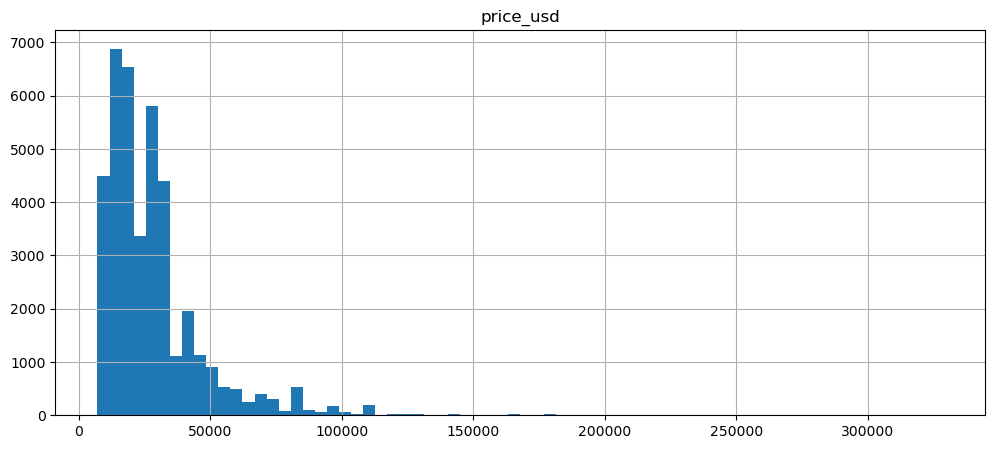

In [100]:
df.hist(column ='price_usd', bins = 70, figsize = (12,5)); #range = (0,15));

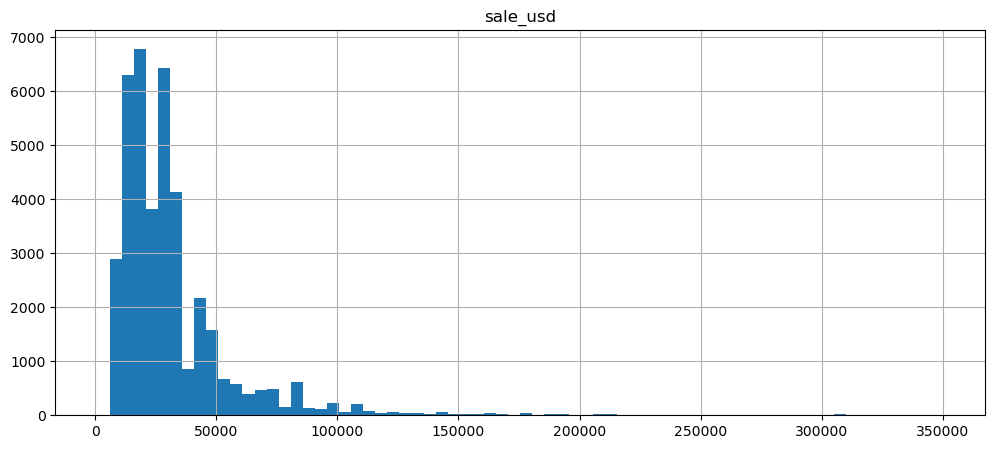

In [101]:
df.hist(column ='sale_usd', bins = 70, figsize = (12,5), range = (1000,350000));

Средняя цена автомобиля равна 28 тыс USD. Минимальная цена автомобиля равна 7.1 тыс USD. Максимальная цена автомобиля равна 328 тыс USD. Медиана равна 24 тыс USD и значительно отличаются от средней цены. Разброс и стандартное отклонение также значительны, поэтому далее лучше использовать медианное значение. Распределение price_usd и sale_usd похожи и распределение больше смещянно влево и имеет большой хвост справа.

In [102]:
df['sale_usd'].sort_values(ascending=False)

39561    3778206.264
39553    3157811.637
39560    2277367.677
20218    2004332.626
25555    1870000.000
            ...     
37727          0.000
37416          0.000
38775          0.000
16741          0.000
25728     -35588.250
Name: sale_usd, Length: 39966, dtype: float64

In [103]:
df.loc[df['sale_usd'] < 0]

,company,brand,model,year_of_release,fuel,engine_capacity,transmission,type_of_drive,region,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,localization,date,country,country_alpha
25728,БИПЭК АВТО,Skoda,Superb,2019.0,F,2.0,MT,4WD,Тараз,-1.0,35588.25,-35588.25,Жамбылская область,Легковые автомобили,D класс,Локальное производство,2019-08-01,Kazakhstan,None


In [104]:
df['sale_usd'].value_counts()

9884.695773     559
12819.736950    412
9893.925137     402
9969.169424     315
13800.000000    230
               ... 
27523.850160      1
27151.765110      1
27521.364380      1
55042.728760      1
30568.901860      1
Name: sale_usd, Length: 4183, dtype: int64

Сумма заказов бывают и большие в денежном выражении (максимальное значение 3,7 млн долл), но большее число сделок происходят в дешевом автомобильном сегменте 9-12 тыс. долл. Случался и один возврат автомобиля(отрицательное число).

Удаление выбросов из ***sale_usd*** приведет к тому, что sale_usd будет равна price_usd, так как останутся сделки с 1 автомобилем.

**engine_capacity**

In [105]:
df.loc[df['engine_capacity']>0, 'engine_capacity'].describe()

count    35715.000000
mean         2.312065
std          1.879304
min          1.200000
25%          1.600000
50%          2.000000
75%          2.500000
max         90.000000
Name: engine_capacity, dtype: float64

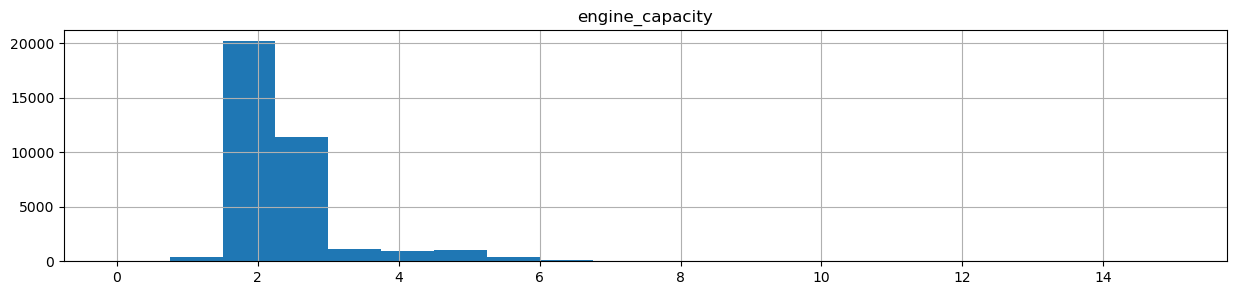

In [106]:
df.loc[df['engine_capacity']>0].hist(column ='engine_capacity', bins = 20, figsize = (15,3), range = (0,15));

In [107]:
df.loc[df['engine_capacity'] > 0, 'engine_capacity'].value_counts().head(10)

1.6    8032
2.0    7934
2.5    5034
2.7    4668
1.5    2720
1.7    1117
2.4    1103
4.6     754
3.5     705
4.0     679
Name: engine_capacity, dtype: int64

Средний объем двигателя равен 2.3л, а медианное значение равно 2.0л. В целом данные распределены с небольшим смещением влево, так как в данных есть некоторое количество грузовых автомобилей.

**Количество**

In [108]:
df['quantity'].describe()

count    39960.000000
mean         1.348198
std          2.373089
min         -1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        115.000000
Name: quantity, dtype: float64

Рассмотрим данные, в которых количество автомобелей при покупке больше 2

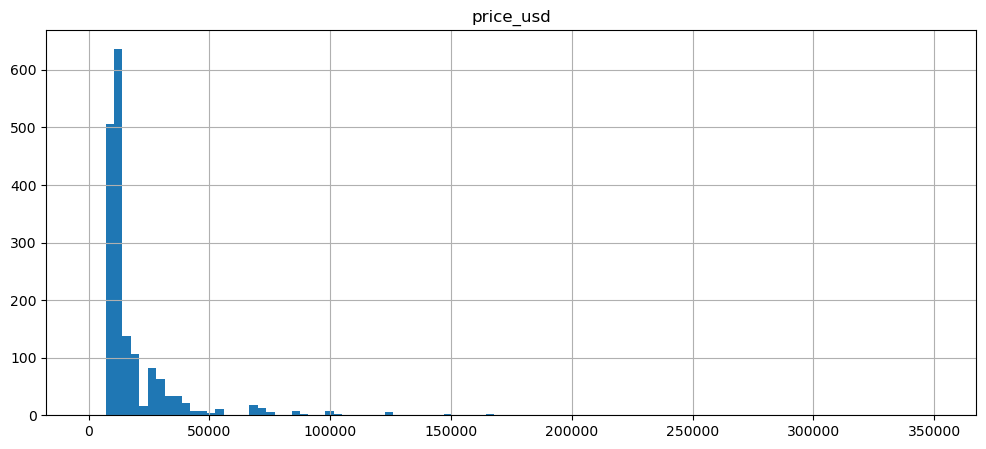

In [109]:
filtered_quantity = df[df['quantity'] > 2] #количеством покупок больше 2
filtered_quantity.hist(column ='price_usd', bins = 100, figsize = (12,5), range=(0,350000));

In [110]:
filtered_quantity[['brand', 'model', 'quantity']].sort_values(by='quantity', ascending=False).head(15)

,brand,model,quantity
16885,Lada,4x4,115.0
25555,Skoda,Octavia,100.0
38408,Volkswagen,Polo,79.0
13699,Jac,S3,70.0
16968,Lada,4x4,66.0
16299,Kia,Rio,63.0
38423,Volkswagen,Polo,62.0
38424,Volkswagen,Polo,62.0
16363,Kia,Rio,60.0
16858,Lada,4x4,54.0


Наибольшее количество купленных автомобилей за один раз равно 115 штук. Автомобили в больших заказах часто похожи на автомобили для такси.

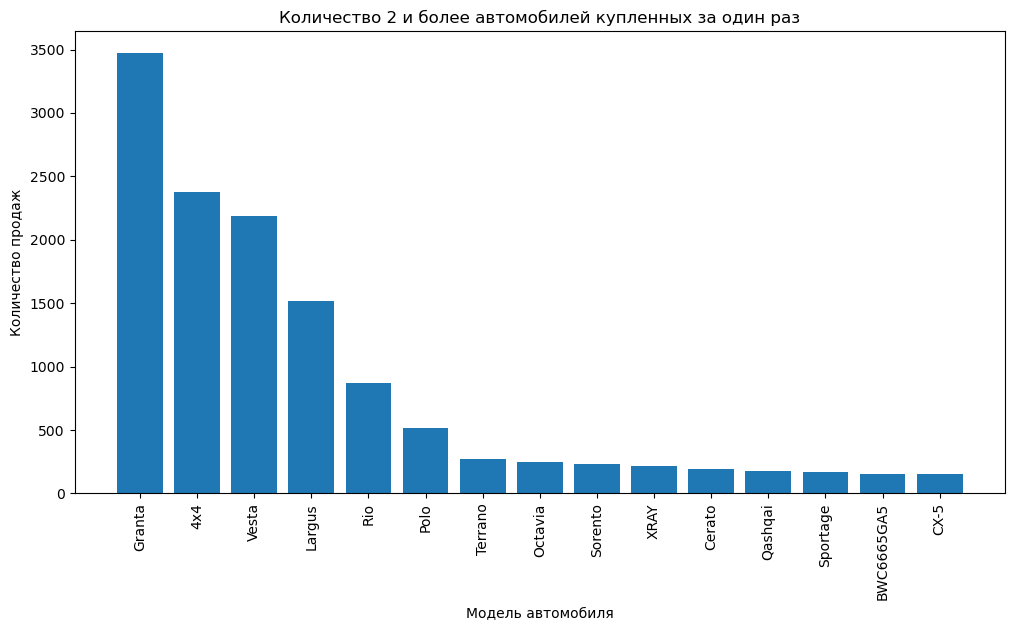

In [111]:
# Группируем данные по моделям и считаем сумму продаж
model_filtered_quantity = filtered_quantity.groupby('model')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False).head(15)

# Строим столбчатую диаграмму
plt.figure(figsize=(12, 6))
plt.bar(model_filtered_quantity['model'], model_filtered_quantity['quantity'])
plt.title('Количество 2 и более автомобилей купленных за один раз')
plt.xlabel('Модель автомобиля')
plt.ylabel('Количество продаж')
plt.xticks(rotation=90)  # Поворачиваем подписи по оси X для лучшей читаемости
plt.show()

При этом самые популярные модели автомобилей для больших заказов это первые 4 места LADA(Granta, 4х4, Vesta, Largus) 5.Kia Rio 6. Volkswagen Polo.

**Рассмотрим большие заказы с авто дороже средней цены**

In [112]:
filtered_quantity_expencive = df[(df['quantity'] > 2) & ((df['price_usd'] > 25000))]

In [113]:
filtered_quantity_expencive[['brand', 'model', 'quantity']].sort_values(by='quantity', ascending=False).head(15)

,brand,model,quantity
39561,Daewoo,BC 095,50.0
39560,Daewoo,BC 095,30.0
39553,Daewoo,BC 211 MA,30.0
39443,Dong Feng,BWC6665GA5,30.0
39442,Dong Feng,BWC6665GA5,30.0
39440,Dong Feng,BWC6665GA5,29.0
25658,Skoda,Superb,23.0
39447,Dong Feng,BWC6665GA5,22.0
39444,Dong Feng,BWC6665GA5,22.0
38598,Урал,4320,22.0


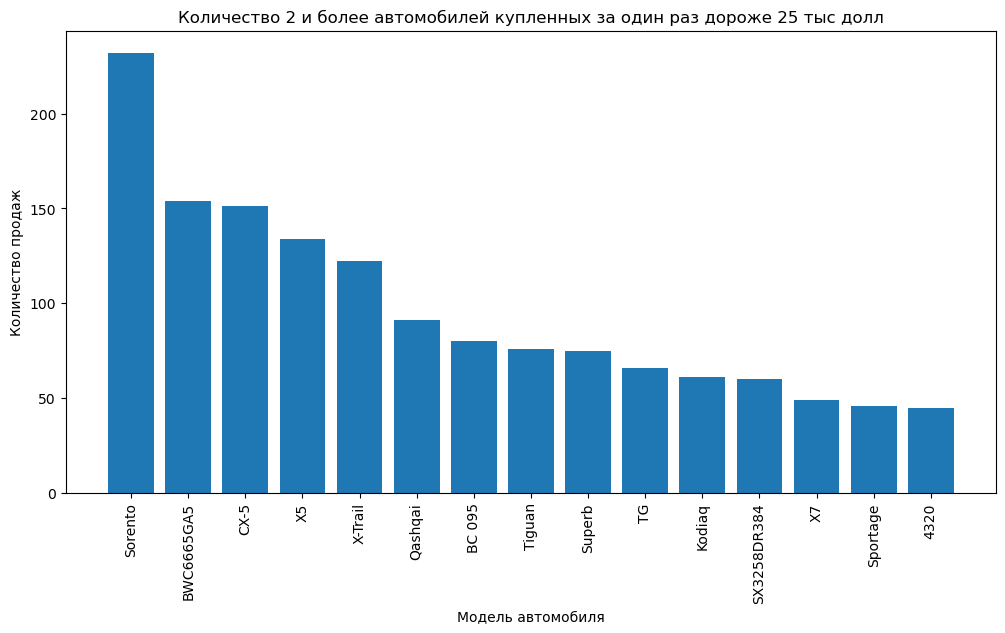

In [114]:
# Группируем данные по моделям и считаем сумму продаж
expencive = filtered_quantity_expencive.groupby('model')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False).head(15)

# Строим столбчатую диаграмму
plt.figure(figsize=(12, 6))
plt.bar(expencive['model'], expencive['quantity'])
plt.title('Количество 2 и более автомобилей купленных за один раз дороже 25 тыс долл')
plt.xlabel('Модель автомобиля')
plt.ylabel('Количество продаж')
plt.xticks(rotation=90)  # Поворачиваем подписи по оси X для лучшей читаемости
plt.show()

Для больших закупок авто с ценой выше среднего харктерны покупки городских автобусов, грузовиков и авто более высокого класса(клмфорт для такси?)

**Корреляция**

Рассмотрим корреляцию для числовых переменных

In [115]:
# Выделим числовые переменные
numeric_cols = df.select_dtypes(include='number').columns
numeric_cols

Index(['year_of_release', 'engine_capacity', 'quantity', 'price_usd',
       'sale_usd'],
      dtype='object')

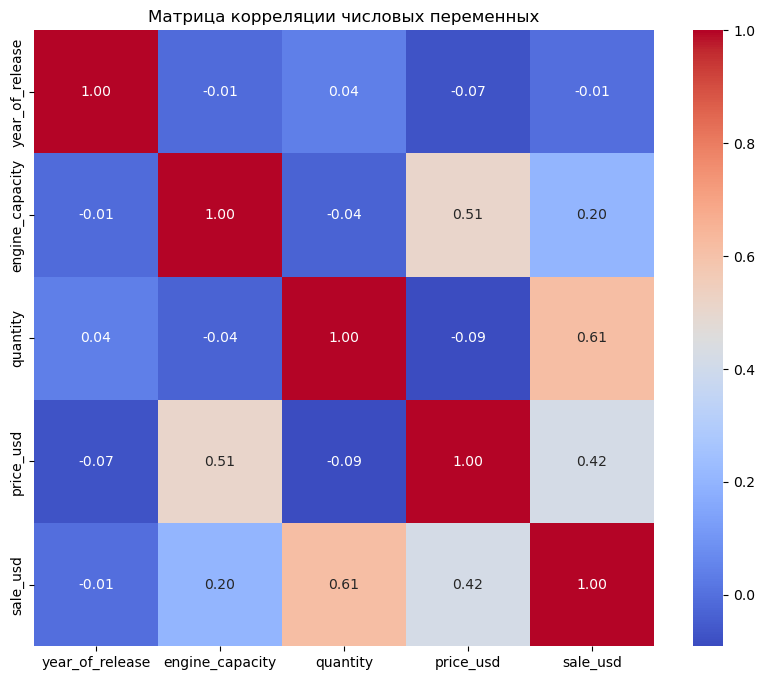

In [116]:
# Матрица корреляции
corr_matrix = df[numeric_cols].corr()

# Тепловая карта
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляции числовых переменных')
plt.show()

Результаты получились ожидаемыми, стоит внимательнее рассмотреть корреляцию между engine_capacity и price_usd

Осутствие корреляции между ценой и годом выпуска автомобиля связано с тем, что в данных в основном представлены автомобили только 2019 и 2018 года

In [117]:
df['year_of_release'].value_counts()

2019.0    30026
2018.0     9081
2017.0      324
2016.0       30
2014.0        2
2013.0        1
2011.0        1
Name: year_of_release, dtype: int64

In [118]:
#почистим данные и сохраним их в новую переменную
new_df = df[df['engine_capacity'] > 0]
new_df

,company,brand,model,year_of_release,fuel,engine_capacity,transmission,type_of_drive,region,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,localization,date,country,country_alpha
0,Mercur Auto,Audi,A3,2018.0,F,1.4,AT,FWD,Алматы,1.0,28115.00000,28115.00000,г.Алматы,Легковые автомобили,C класс,Импорт,2019-05-01,Germany,None
1,Mercur Auto,Audi,A3,2018.0,F,1.4,AT,FWD,Алматы,1.0,32246.99000,32246.99000,г.Алматы,Легковые автомобили,C класс,Импорт,2019-08-01,Germany,None
2,Mercur Auto,Audi,A4,2018.0,F,1.4,AT,FWD,Алматы,1.0,32000.00000,32000.00000,г.Алматы,Легковые автомобили,D класс,Импорт,2019-04-01,Germany,None
3,Mercur Auto,Audi,A4,2018.0,F,1.4,AT,FWD,Алматы,1.0,31929.00000,31929.00000,г.Алматы,Легковые автомобили,D класс,Импорт,2019-07-01,Germany,None
4,Mercur Auto,Audi,A4,2018.0,F,1.4,AT,FWD,Алматы,1.0,31929.00000,31929.00000,г.Алматы,Легковые автомобили,D класс,Импорт,2019-07-01,Germany,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39891,Allur Auto,Yutong,ZK6108HGH,2019.0,D,6.5,MT,2WD,Костанай,1.0,98175.23246,98175.23246,Костанайская область,Коммерческие автомобили,Средние автобусы,Локальное производство,2019-09-01,Kazakhstan,None
39892,Allur Auto,Yutong,ZK6108HGH,2019.0,D,6.5,MT,2WD,Костанай,1.0,98175.23246,98175.23246,Костанайская область,Коммерческие автомобили,Средние автобусы,Локальное производство,2019-09-01,Kazakhstan,None
39948,Scandinavian Motors,Volvo,V90,2018.0,F,2.0,AT,4WD,Алматы,1.0,59199.84723,59199.84723,г.Алматы,Легковые автомобили,E класс,Импорт,2019-01-01,Sweden,None
39949,Scandinavian Motors,Volvo,V90,2019.0,F,2.0,AT,4WD,Алматы,1.0,56646.47593,56646.47593,г.Алматы,Легковые автомобили,E класс,Импорт,2019-04-01,Sweden,None


In [119]:
new_df['price_usd'].corr(new_df['engine_capacity'])

0.5642059415599534

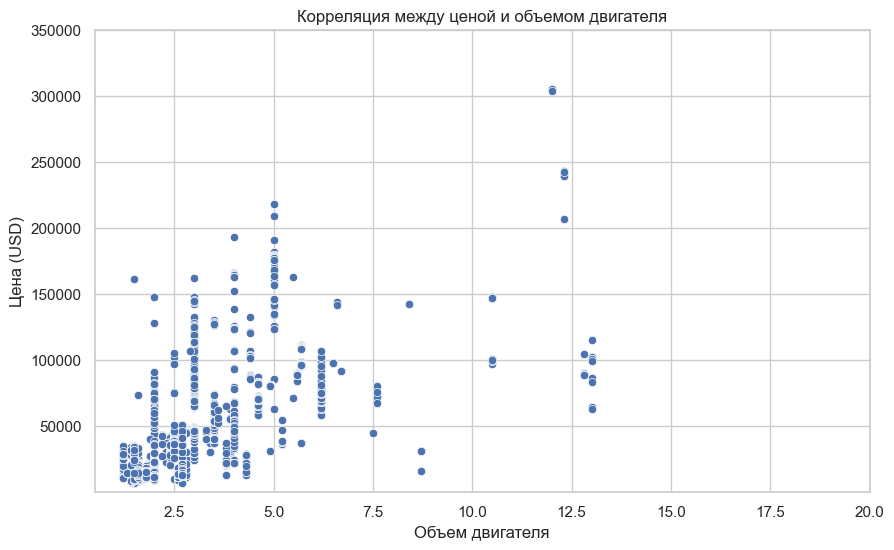

In [120]:
# Установите стиль графика
sns.set(style="whitegrid")

# Создадим scatter plot для определения корреляции
plt.figure(figsize=(10, 6))
sns.scatterplot(x='engine_capacity', y='price_usd', data=df)
plt.title('Корреляция между ценой и объемом двигателя')

# Установим новые пределы значений по осям
plt.xlim(0.5, 20)  # Новые пределы по оси X
plt.ylim(0.5, 350000)  # Новые пределы по оси Y

plt.xlabel('Объем двигателя')
plt.ylabel('Цена (USD)')
plt.show()

Корреляция для очищеных данных равна 0.56. Корреляция для очищеных данных между ценой и объемом двигателя выше, чем для данных до отчистки

**Вывод:**

Средняя цена автомобиля равна 28 тыс долл. Минимальная цена автомобиля равна 7.1 тыс долл. Максимальная цена автомобиля равна 328 тыс долл. Медианна цена равна 24 тыс долл и значительно отличаются от средней цены. Средний объем двигателя равен 2.3л, а медианное значение равно 2.0л.

Суммы заказов бывают большие в денежном выражении (максимальное значение 3,7 млн долл), но большее число сделок происходят в дешевом автомобильном сегменте 9-12 тыс. долл.
Наибольшее количество купленных автомобилей за один раз равно 115 штук. Автомобили в больших заказах часто похожи на автомобили для такси. Самые популярные модели автомобилей для больших заказов это: первые 4 места LADA(Granta, 4х4, Vesta, Largus) 5.Kia Rio 6. Volkswagen Polo. Для больших закупок авто с ценой выше среднего харктерны покупки городских автобусов, грузовиков и авто более высокого класса(клмфорт для такси?)



# 4. [Исследование рынка](#four)

**Продажи на рынке Казахстана всех марок в денежном(USD) и натуральном выражении(шт)**

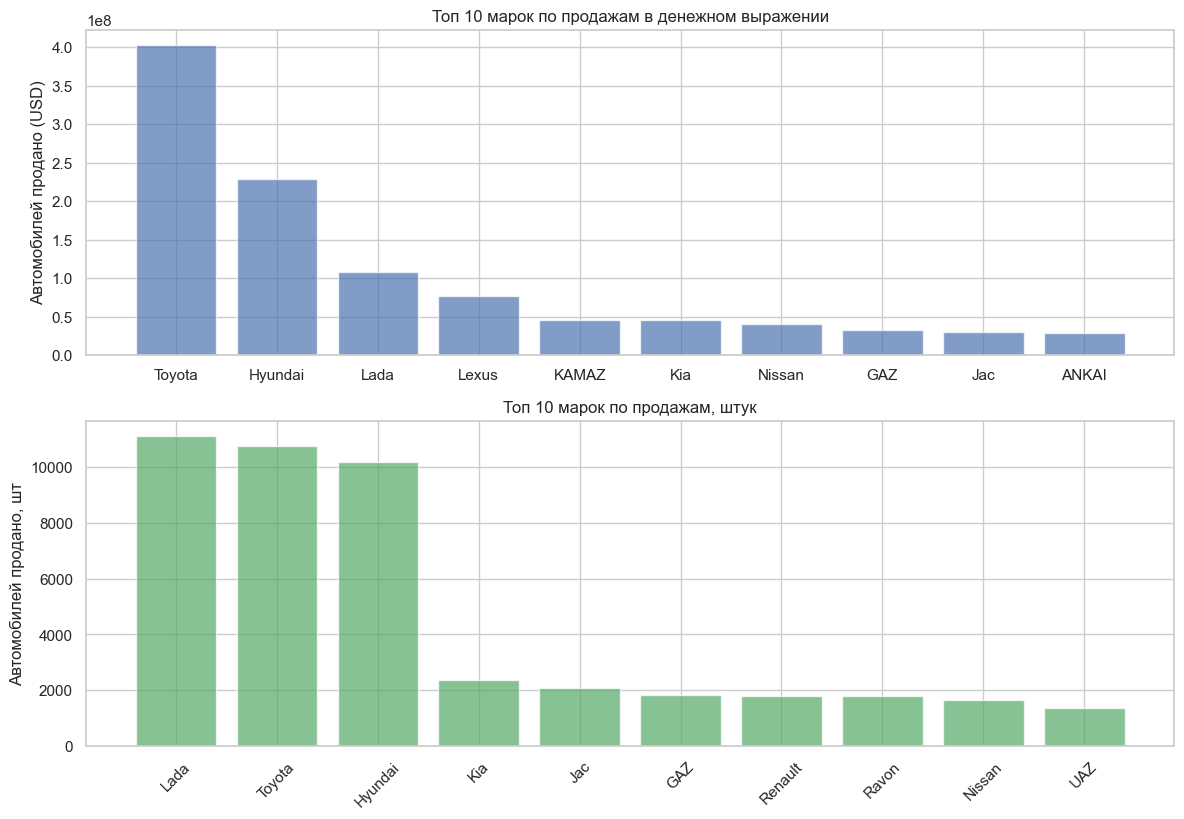

In [121]:
# Группировка данных и подсчет суммы продаж и количества проданных автомобилей по маркам
brand_sales = df.groupby('brand').agg({'quantity': 'sum', 'sale_usd': 'sum'}).reset_index()

# Сортировка по денежным и выбор топ-10 марок
top_brands_by_sales = brand_sales.sort_values(by='sale_usd', ascending=False).head(10)

# Сортировка по натуральным и выбор топ-10 марок
top_brands_by_quantity = brand_sales.sort_values(by='quantity', ascending=False).head(10)

# Создание двух столбчатых графиков
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

# График денежных продаж
axes[0].bar(top_brands_by_sales['brand'], top_brands_by_sales['sale_usd'], color='b', alpha=0.7)
axes[0].set_title('Топ 10 марок по продажам в денежном выражении')
axes[0].set_ylabel('Автомобилей продано (USD)')

# График натуральных продаж
axes[1].bar(top_brands_by_quantity['brand'], top_brands_by_quantity['quantity'], color='g', alpha=0.7)
axes[1].set_title('Топ 10 марок по продажам, штук')
axes[1].set_ylabel('Автомобилей продано, шт')

# Вывод графиков
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

Топ 5 марок по продажам в натуральном выражении: Lada, Toyota, Hyundai, Kia, Jac   

Топ 5 марок по продажам в денежном выражении: Toyota, Hyundai, Lada, Lexus, Kamaz

При этом Топ-3 марки в натуральном и денежном выражении сильно больше, чем остальные марки. При этом далее до 10 места разница между марками незначительна.

**Автомобили ниже среденей цены**

Рассмотрим самые популярные автомобильные марки в более дешевом сегменте автомобилей до 26000$

In [122]:
cheap = df[df['price_usd'] < 26000]

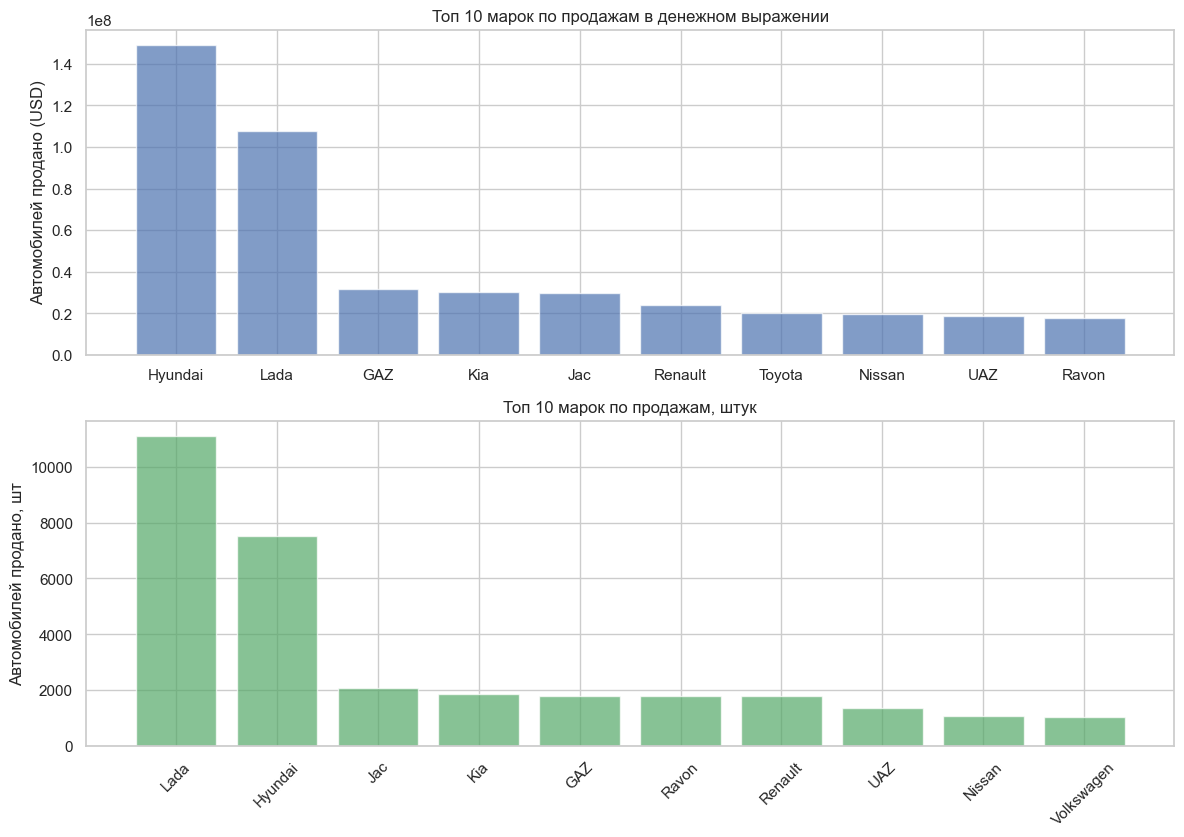

In [123]:
# Группировка данных и подсчет суммы продаж и количества проданных автомобилей по маркам
brand_sales_cheap = cheap.groupby('brand').agg({'quantity': 'sum', 'sale_usd': 'sum'}).reset_index()

# Сортировка по денежным и выбор топ-10 марок
top_brands_by_sales_cheap = brand_sales_cheap.sort_values(by='sale_usd', ascending=False).head(10)

# Сортировка по натуральным и выбор топ-10 марок
top_brands_by_quantity_cheap = brand_sales_cheap.sort_values(by='quantity', ascending=False).head(10)

# Создание двух столбчатых графиков
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

# График денежных продаж
axes[0].bar(top_brands_by_sales_cheap['brand'], top_brands_by_sales_cheap['sale_usd'], color='b', alpha=0.7)
axes[0].set_title('Топ 10 марок по продажам в денежном выражении')
axes[0].set_ylabel('Автомобилей продано (USD)')

# График натуральных продаж
axes[1].bar(top_brands_by_quantity_cheap['brand'], top_brands_by_quantity_cheap['quantity'], color='g', alpha=0.7)
axes[1].set_title('Топ 10 марок по продажам, штук')
axes[1].set_ylabel('Автомобилей продано, шт')

# Вывод графиков
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

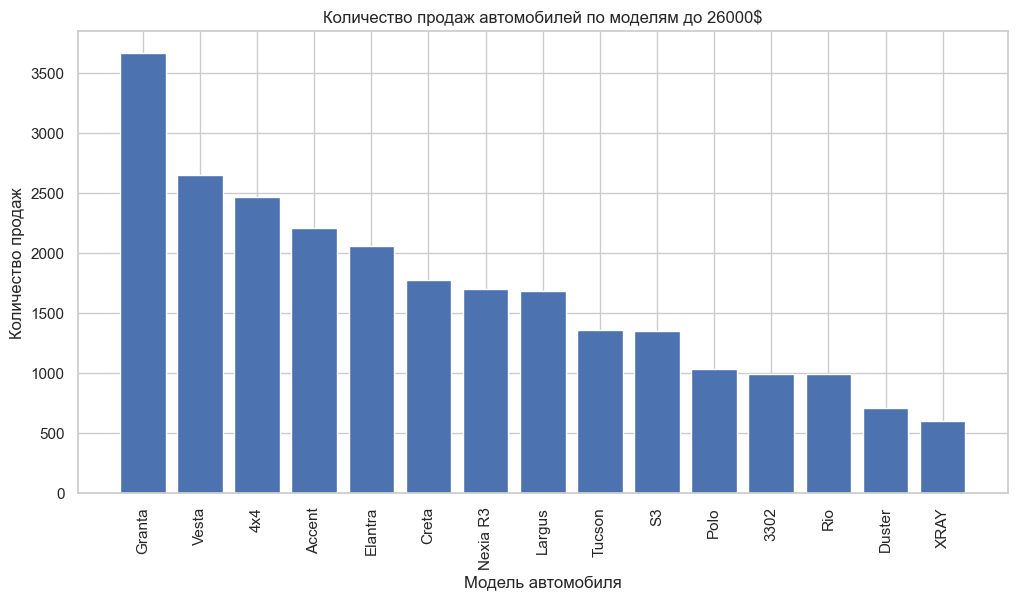

In [124]:
# Группируем данные по моделям и считаем сумму продаж
a = cheap.groupby('model')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False).head(15)

# Строим столбчатую диаграмму
plt.figure(figsize=(12, 6))
plt.bar(a['model'], a['quantity'])
plt.title('Количество продаж автомобилей по моделям до 26000$')
plt.xlabel('Модель автомобиля')
plt.ylabel('Количество продаж')
plt.xticks(rotation=90)  # Поворачиваем подписи по оси X для лучшей читаемости
plt.show()

Для автомобилей ниже среденей цены ярковыраженный топ 2 марки:Lada, Hyundai. Самыми популярными марками являются Lada Granta, Lada 4x4, Hyundai Accent, Hyundai Elantra, Hyundai Creta, Nexia.

**Автомобили выше среденей цены**

Рассмотрим самые популярные автомобильные марки в более дорогом сегменте автомобилей дороже 26000$

In [125]:
upmid = df[df['price_usd'] > 26000]

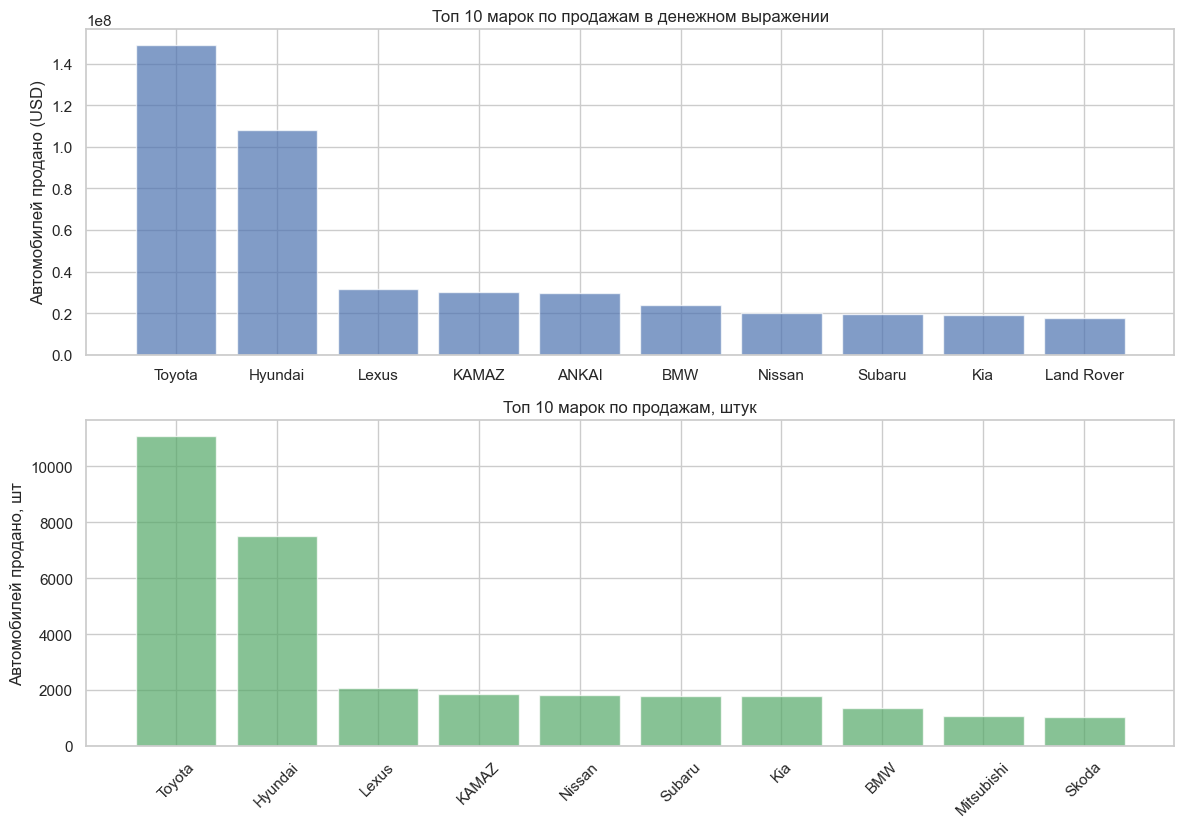

In [126]:
# Группировка данных и подсчет суммы продаж и количества проданных автомобилей по маркам
brand_sales_upmid = upmid.groupby('brand').agg({'quantity': 'sum', 'sale_usd': 'sum'}).reset_index()

# Сортировка по денежным и выбор топ-10 марок
top_brands_by_sales_upmid = brand_sales_upmid.sort_values(by='sale_usd', ascending=False).head(10)

# Сортировка по натуральным и выбор топ-10 марок
top_brands_by_quantity_upmid = brand_sales_upmid.sort_values(by='quantity', ascending=False).head(10)

# Создание двух столбчатых графиков
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

# График денежных продаж
axes[0].bar(top_brands_by_sales_upmid['brand'], top_brands_by_sales_cheap['sale_usd'], color='b', alpha=0.7)
axes[0].set_title('Топ 10 марок по продажам в денежном выражении')
axes[0].set_ylabel('Автомобилей продано (USD)')

# График натуральных продаж
axes[1].bar(top_brands_by_quantity_upmid['brand'], top_brands_by_quantity_cheap['quantity'], color='g', alpha=0.7)
axes[1].set_title('Топ 10 марок по продажам, штук')
axes[1].set_ylabel('Автомобилей продано, шт')

# Вывод графиков
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

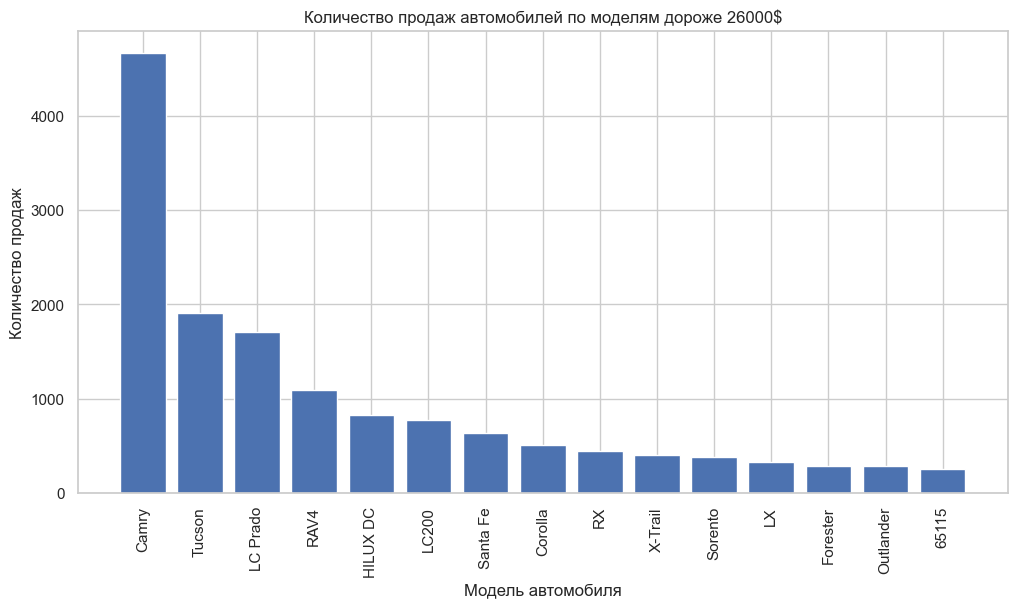

In [127]:
# Группируем данные по моделям и считаем сумму продаж
b = upmid.groupby('model')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False).head(15)

# Строим столбчатую диаграмму
plt.figure(figsize=(12, 6))
plt.bar(b['model'], b['quantity'])
plt.title('Количество продаж автомобилей по моделям дороже 26000$')
plt.xlabel('Модель автомобиля')
plt.ylabel('Количество продаж')
plt.xticks(rotation=90)  # Поворачиваем подписи по оси X для лучшей читаемости
plt.show()

Для автомобилей выше среденей цены ярковыраженный топ 2 марки: Toyota, Hyundai. Самыми популярными марками являются: Toyota Camry(популярнее в 2.5 раза, чем №2), Hyundai Tucson, Toyota LC Prado, Toyota RAV4, Toyota Hilux DC, Toyota LC200.

**Динамика продаж по рынку в денежном и натуральном выражении (помесячно)**

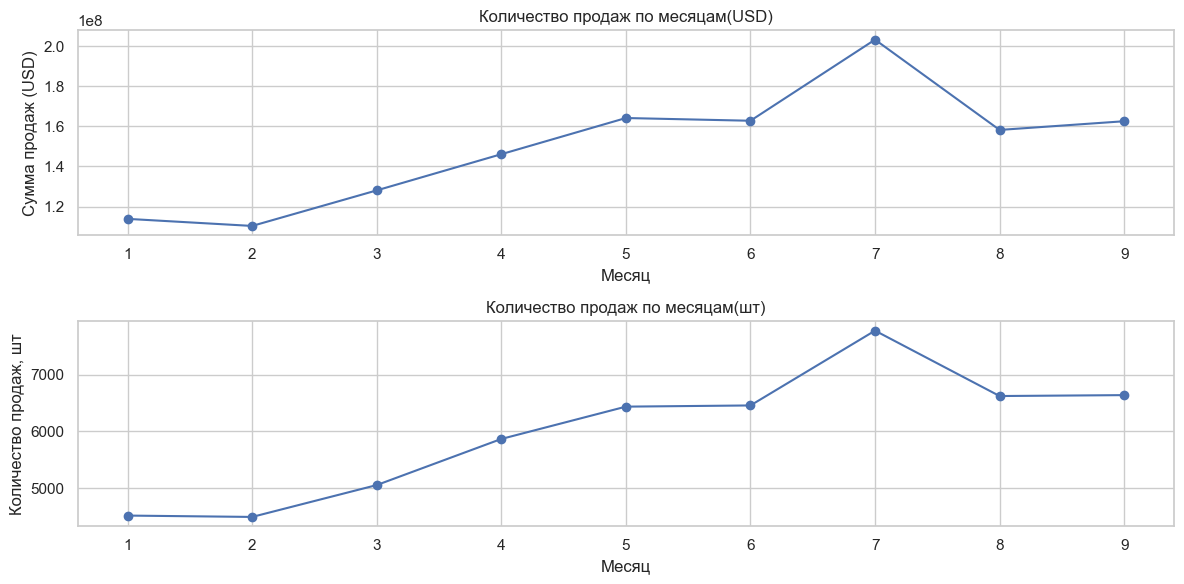

In [128]:
# Создание столбцов для месяца продажи в денежном и натуральном выражении
df['sale_month'] = df['date'].dt.month
monthly_sales = df.groupby(['sale_month'])[['quantity', 'sale_usd']].sum().reset_index()

# Построение графиков
plt.figure(figsize=(12, 6))

# График продаж в денежном выражении
plt.subplot(2, 1, 1)
plt.plot(monthly_sales['sale_month'], monthly_sales['sale_usd'], marker='o', linestyle='-')
plt.title('Количество продаж по месяцам(USD)')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж (USD)')

# График натуральном выражении
plt.subplot(2, 1, 2)
plt.plot(monthly_sales['sale_month'], monthly_sales['quantity'], marker='o', linestyle='-')
plt.title('Количество продаж по месяцам(шт)')
plt.xlabel('Месяц')
plt.ylabel('Количество продаж, шт')

plt.tight_layout()
plt.show()

Можно увидеть определнную сезонность, сделки чаще совершаются в летние месяцы.

**Динамика продаж по типу топлива (помесячно)**

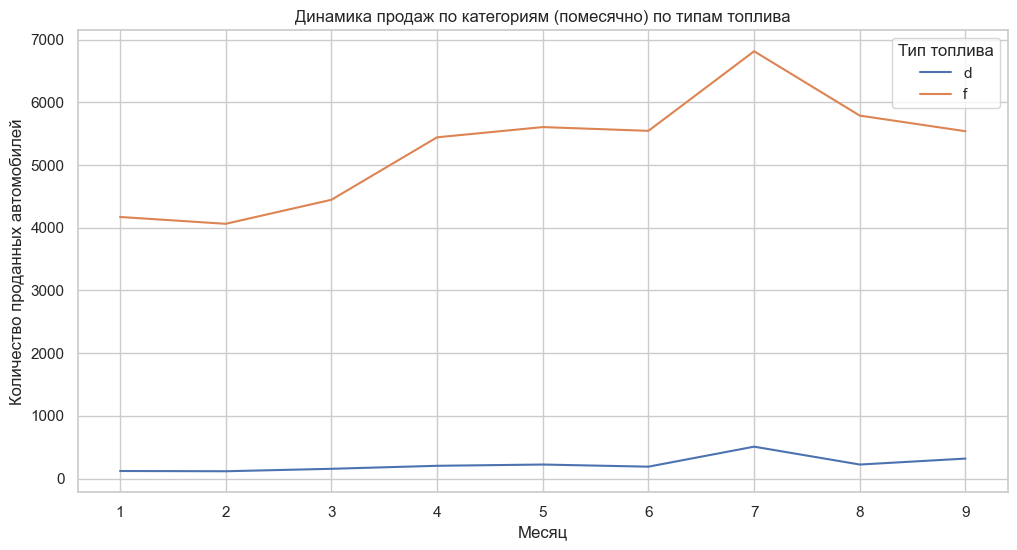

In [129]:
# Приведение столбца 'fuel' к нижнему регистру перед фильтрацией, потому что она почему-то без этого не сработывала
df['fuel'] = df['fuel'].str.lower()

# Фильтрация данных для исключения строк с значением 'unknown' в столбце 'fuel'
filtered_df = df[(df['fuel'] != 'unknown') & (df['fuel'] != 'hyb') & (df['fuel'] != 'e')]

# Группировка данных и подсчет суммы продаж по типу топлива и месяцу
fuel_sales = filtered_df.groupby(['sale_month', 'fuel'])['quantity'].sum().unstack()

# Построение графика
fuel_sales.plot(kind='line', figsize=(12, 6))
plt.title('Динамика продаж по категориям (помесячно) по типам топлива')
plt.xlabel('Месяц')
plt.ylabel('Количество проданных автомобилей')
plt.legend(title='Тип топлива')
plt.show()

Большее количество автомобилей было продано с бензиновым двигатем

**Динамика продаж по классу автомобилей (помесячно)**

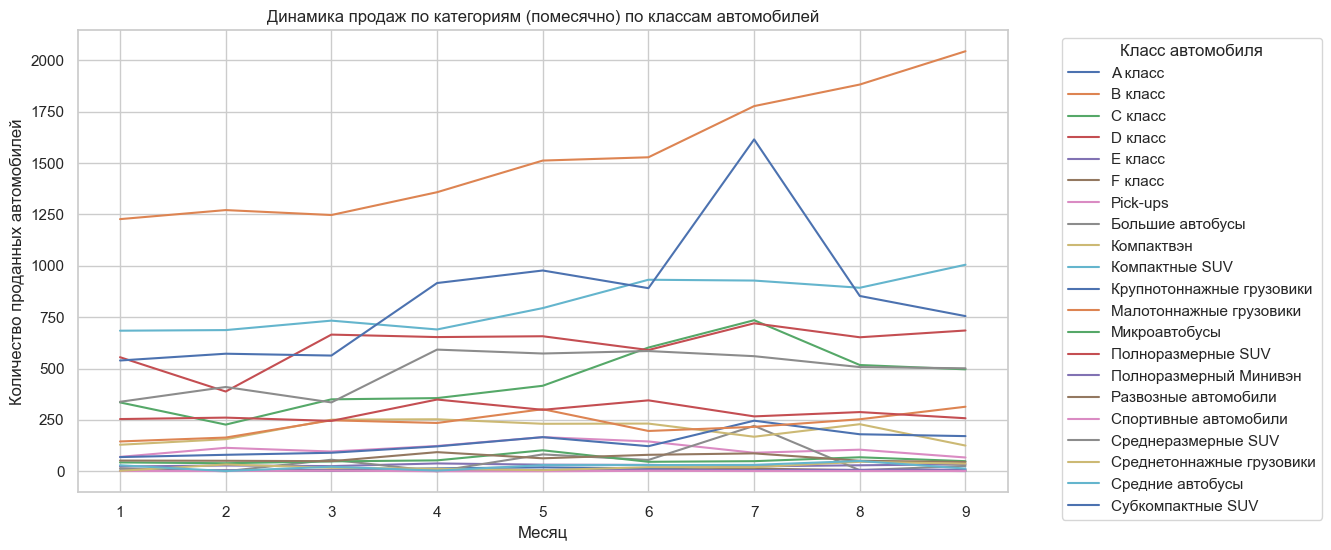

In [130]:
# Группировка данных и подсчет суммы продаж по классу и месяцу
class_sales = df.groupby(['sale_month', 'class_2013'])['quantity'].sum().unstack()

# Построение графика
class_sales.plot(kind='line', figsize=(12, 6))
plt.title('Динамика продаж по категориям (помесячно) по классам автомобилей')
plt.xlabel('Месяц')
plt.ylabel('Количество проданных автомобилей')
plt.legend(title='Класс автомобиля', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Динамика продаж по сегменту автомобиля (помесячно)**

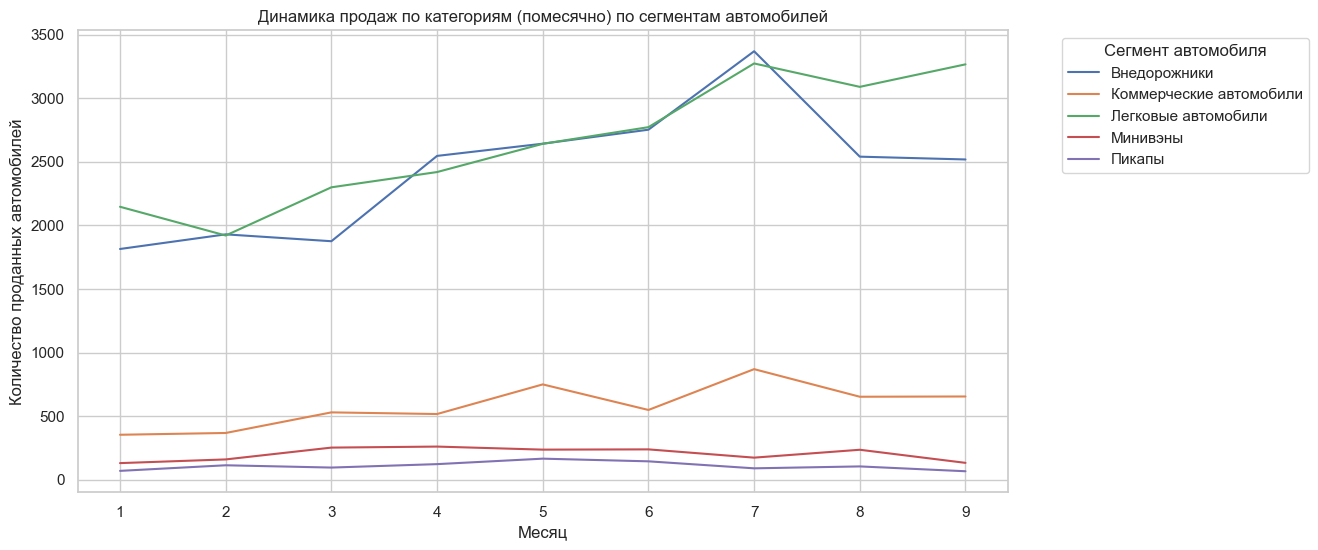

In [131]:
# Группировка данных и подсчет суммы продаж по сегменту и месяцу
segment_sales = df.groupby(['sale_month', 'segmentation_2013'])['quantity'].sum().unstack()

# Построение графика
segment_sales.plot(kind='line', figsize=(12, 6))
plt.title('Динамика продаж по категориям (помесячно) по сегментам автомобилей')
plt.xlabel('Месяц')
plt.ylabel('Количество проданных автомобилей')
plt.legend(title='Сегмент автомобиля', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Наиболее популярные автомбили в сегменте легковых автомобилей и внедорожников. Для сделок в сегменте коммерческих автомобилей не так ярко выражена сезонность.

**Динамика продаж по типу коробки передач (помесячно)**

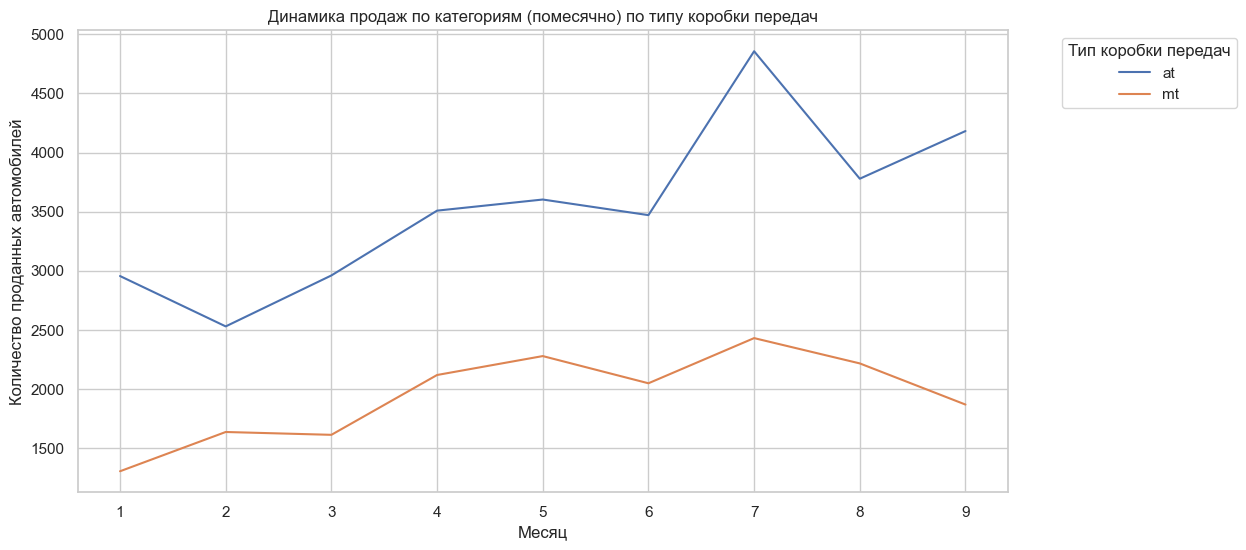

In [132]:
# Приведение столбца 'fuel' к нижнему регистру перед фильтрацией, потому что она почему-то без этого не сработывала
df['transmission'] = df['transmission'].str.lower()
# Группировка данных и подсчет суммы продаж по сегменту и месяцу
filtered_df_1 = df[df['transmission'] != 'unknown']
segment_sales = filtered_df_1.groupby(['sale_month', 'transmission'])['quantity'].sum().unstack()

# Построение графика
segment_sales.plot(kind='line', figsize=(12, 6))
plt.title('Динамика продаж по категориям (помесячно) по типу коробки передач')
plt.xlabel('Месяц')
plt.ylabel('Количество проданных автомобилей')
plt.legend(title='Тип коробки передач', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Большее количество автомобилей было продано с автоматической каробкой передач.

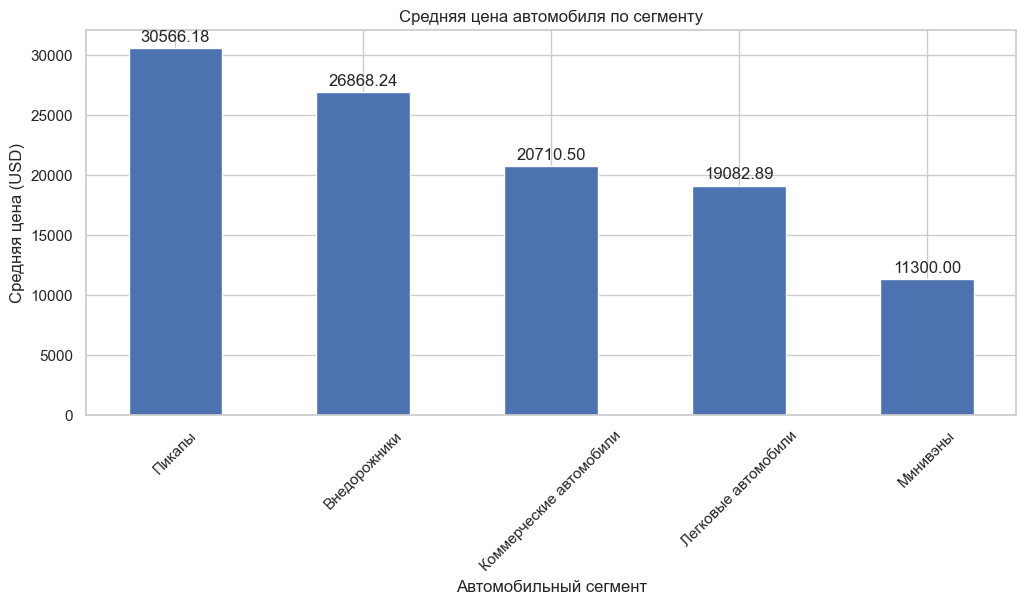

In [133]:
# Группировка данных и подсчет средней цены для каждого сегмента
segment_prices = df.groupby('segmentation_2013')['price_usd'].median().sort_values(ascending=False)

# Создание графика
plt.figure(figsize=(12, 5))
bars = plt.bar(segment_prices.index, segment_prices.values, width=0.5)
plt.title('Средняя цена автомобиля по сегменту')
plt.xlabel('Автомобильный сегмент')
plt.ylabel('Средняя цена (USD)')
plt.xticks(rotation=45)  # Поворот названий сегментов для лучшей читаемости

# Добавление значений над каждым столбцом
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords='offset points', ha='center', va='bottom')

plt.show()

Наиболее дорогие автомобили в сегменте: пикапы (30,5 тыс долл); внедорожники(26,8 тыс долл); коммерческие автомобили (20,7 тыс долл); легковые автомобили(19 тыс долл) и минивэны(11,3 тыс долл).

**Количество продаж в разбивке по областям**

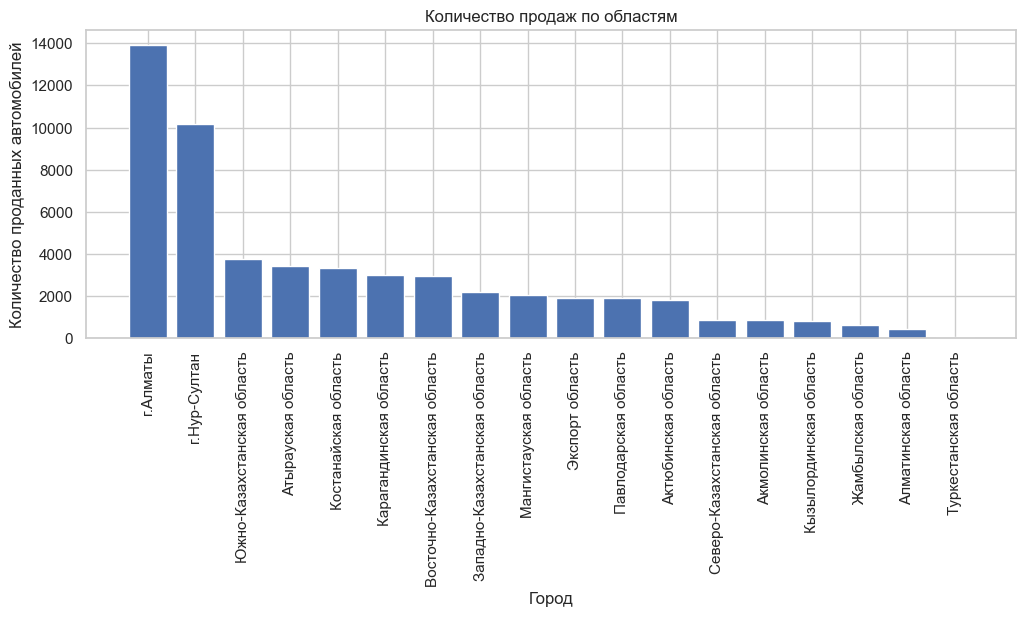

In [134]:
# Группировка данных и подсчет суммы продаж по области
region_sales = df.groupby('area')['quantity'].sum().reset_index()

# Сортировка данных по количеству продаж в убывающем порядке
region_sales = region_sales.sort_values(by='quantity', ascending=False)

# Построение столбчатого графика
plt.figure(figsize=(12, 4))
plt.bar(region_sales['area'], region_sales['quantity'])
plt.title('Количество продаж по областям')
plt.xlabel('Город')
plt.ylabel('Количество проданных автомобилей')
plt.xticks(rotation=90)

plt.show()

**Количество продаж в разбивке по городам**

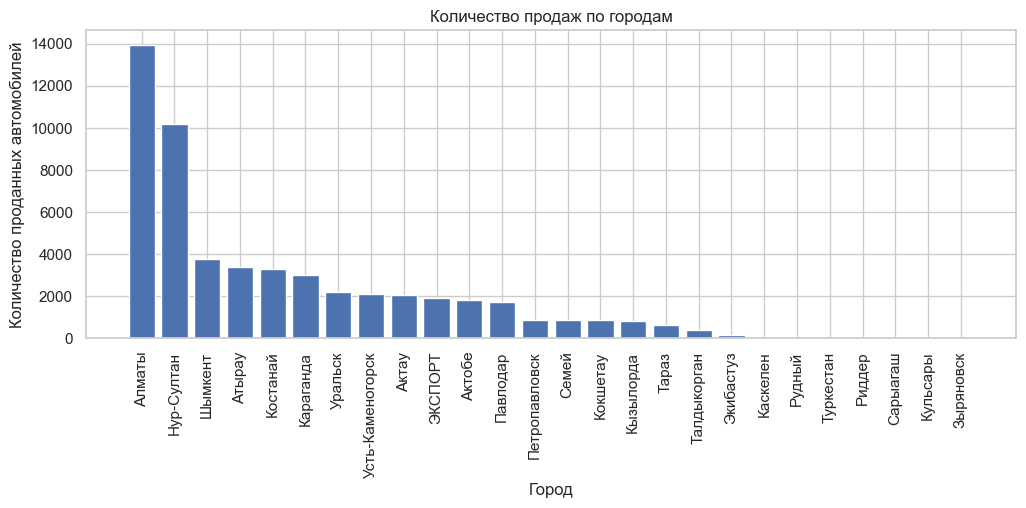

In [135]:
# Группировка данных и подсчет суммы продаж по области
city_sales = df.groupby('region')['quantity'].sum().reset_index()

# Сортировка данных по количеству продаж в убывающем порядке
city_sales = city_sales.sort_values(by='quantity', ascending=False)

# Построение столбчатого графика
plt.figure(figsize=(12, 4))
plt.bar(city_sales['region'], city_sales['quantity'])
plt.title('Количество продаж по городам')
plt.xlabel('Город')
plt.ylabel('Количество проданных автомобилей')
plt.xticks(rotation=90)


plt.show()

Большая часть всех проданных автомобилей в Казахстане продается в городе Алматы и г.Астана. Количество продаж в областях распределено равномерно (чуть больше в тех областях, в которых есть крупные города).

**Количество продаж в разбивке по салонам**

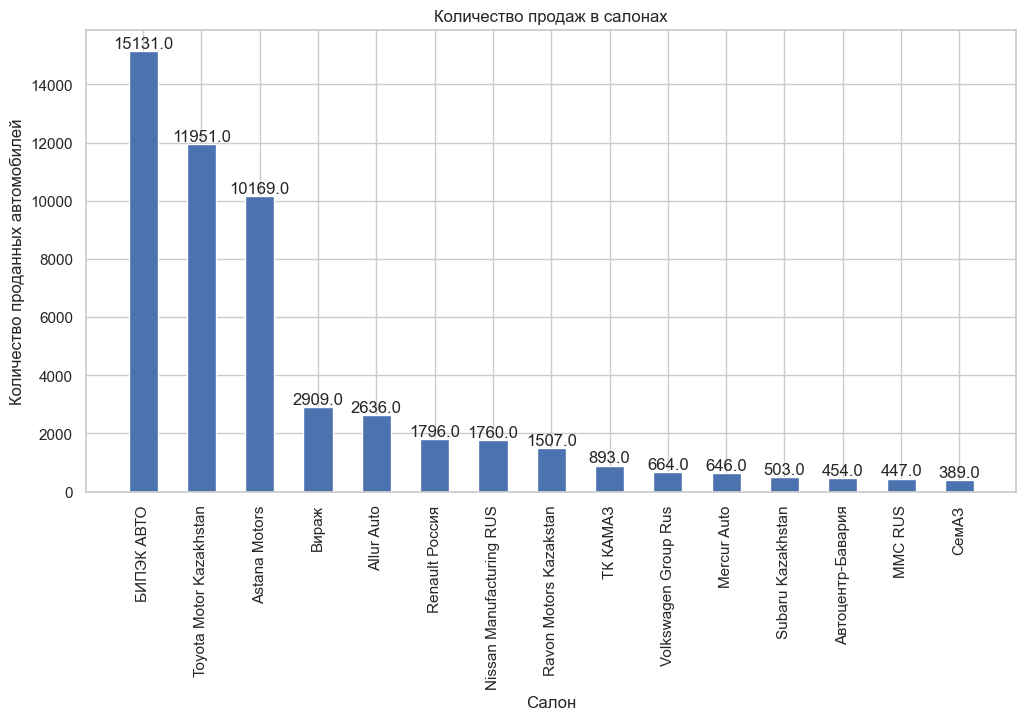

In [136]:
# Группировка данных и подсчет суммы продаж по салонам
company_sales = df.groupby('company')['quantity'].sum().reset_index()

# Сортировка данных по количеству продаж в убывающем порядке
company_sales = company_sales.sort_values(by='quantity', ascending=False).head(15)

# Построение столбчатого графика
plt.figure(figsize=(12, 6))
bars = plt.bar(company_sales['company'], company_sales['quantity'], width=0.5)
plt.title('Количество продаж в салонах')
plt.xlabel('Салон')
plt.ylabel('Количество проданных автомобилей')
plt.xticks(rotation=90)

# Добавление значений на каждый столбец
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

Наиболее популярным салоном является автосалон БИПЭК АВТО, Astana Motors, а также салоны бренда Toyota.  

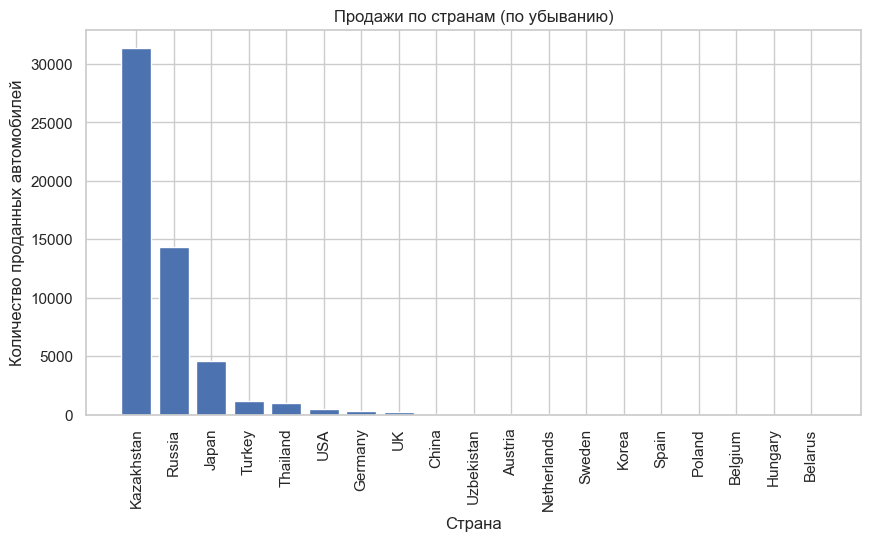

In [137]:
# Группировка данных и подсчет суммы продаж по странам
country_sales = df.groupby('country')['quantity'].sum().reset_index()

# Сортировка по убыванию
country_sales = country_sales.sort_values(by='quantity', ascending=False)

# Построение столбчатого графика
plt.figure(figsize=(10, 5))
plt.bar(country_sales['country'], country_sales['quantity'])
plt.title('Продажи по странам (по убыванию)')
plt.xlabel('Страна')
plt.ylabel('Количество проданных автомобилей')

plt.xticks(rotation=90)  # Поворот названий стран для лучшей читаемости
plt.show()

Большая часть из проданных автомобилей были собраны в Казахстане, также значительная часть автобилей из РФ и Японии.

**Вывод:**

Топ-5 марок по продажам в натуральном выражении: Lada, Toyota, Hyundai, Kia, Jac.
Топ-5 марок по продажам в денежном выражении: Toyota, Hyundai, Lada, Lexus, Kamaz.
Также Топ-3 марки в натуральном и денежном выражении значитольно больше, чем остальные марки. При этом далее с 3 до 10 места разница между марками незначительна.

Для автомобилей ниже среденей цены ярковыраженный топ 2 марки:Lada, Hyundai. Самыми популярными марками являются Lada Granta, Lada 4x4, Hyundai Accent, Hyundai Elantra, Hyundai Creta, Nexia.
Для автомобилей выше среденей цены ярковыраженный топ 2 марки: Toyota, Hyundai. Самыми популярными марками являются: Toyota Camry(популярнее в 2.5 раза, чем №2), Hyundai Tucson, Toyota LC Prado, Toyota RAV4, Toyota Hilux DC, Toyota LC200.
Можно отметить, что Hyundai благодаря обширному модельному ряду занимает лидирующие позиции во всех сегментах. При этом модельный ряд марки Toyota занимает большое количество в сегменте выше среденего.

Можно увидеть определнную сезонность, сделки чаще совершаются в летние месяцы. Для сделок в сегменте коммерческих автомобилей не так ярко выражена сезонность. Большее количество автомобилей было продано с бензиновым двигатем и автоматической каробкой передач. Наиболее популярны автомбили в сегменте легковых автомобилей и внедорожников.  Наиболее дорогие автомобили в сегменте: пикапы (30,5 тыс долл); внедорожники(26,8 тыс долл); коммерческие автомобили (20,7 тыс долл); легковые автомобили(19 тыс долл) и минивэны(11,3 тыс долл).

Большая часть всех проданных автомобилей в Казахстане продается в городе Алматы и г.Астана. Количество продаж в областях распределено равномерно (чуть больше в тех областях, в которых есть крупные города).


# 5. [Общий вывод](#finish)

**Вывод:**
Средняя цена автомобиля равна 28 тыс долл. Минимальная цена автомобиля равна 7.1 тыс долл. Максимальная цена автомобиля равна 328 тыс долл. Медианна цена равна 24 тыс долл и значительно отличаются от средней цены. Средний объем двигателя равен 2.3л, а медианное значение равно 2.0л. Можно увидеть определнную сезонность, сделки чаще совершаются в летние месяцы. Для сделок в сегменте коммерческих автомобилей не так ярко выражена сезонность. Большее количество автомобилей было продано с бензиновым двигатем и автоматической каробкой передач. Наиболее популярны автомбили в сегменте легковых автомобилей и внедорожников.  Наиболее дорогие автомобили в сегменте: пикапы (30,5 тыс долл); внедорожники(26,8 тыс долл); коммерческие автомобили (20,7 тыс долл); легковые автомобили(19 тыс долл) и минивэны(11,3 тыс долл).


Суммы заказов бывают большие в денежном выражении (максимальное значение 3,7 млн долл), но большее число сделок происходят в дешевом автомобильном сегменте 9-12 тыс. долл. Наибольшее количество купленных автомобилей за один раз равно 115 штук. Автомобили в больших заказах часто похожи на автомобили для такси. Самые популярные модели автомобилей для больших заказов это: первые 4 места LADA(Granta, 4х4, Vesta, Largus) 5.Kia Rio 6. Volkswagen Polo. Для больших закупок авто с ценой выше среднего харктерны покупки городских автобусов, грузовиков и авто более высокого класса(клмфорт для такси?)


Топ-5 марок по продажам в натуральном выражении: Lada, Toyota, Hyundai, Kia, Jac.
Топ-5 марок по продажам в денежном выражении: Toyota, Hyundai, Lada, Lexus, Kamaz.
Также Топ-3 марки в натуральном и денежном выражении значитольно больше, чем остальные марки. При этом далее с 3 до 10 места разница между марками незначительна.

Для автомобилей ниже среденей цены ярковыраженный топ 2 марки:Lada, Hyundai. Самыми популярными марками являются Lada Granta, Lada 4x4, Hyundai Accent, Hyundai Elantra, Hyundai Creta, Nexia.
Для автомобилей выше среденей цены ярковыраженный топ 2 марки: Toyota, Hyundai. Самыми популярными марками являются: Toyota Camry(популярнее в 2.5 раза, чем №2), Hyundai Tucson, Toyota LC Prado, Toyota RAV4, Toyota Hilux DC, Toyota LC200.
Можно отметить, что Hyundai благодаря обширному модельному ряду занимает лидирующие позиции во всех сегментах. При этом модельный ряд марки Toyota занимает большое количество в сегменте выше среденего.


Большая часть всех проданных автомобилей в Казахстане продается в городе Алматы и г.Астана. Количество продаж в областях распределено равномерно (чуть больше в тех областях, в которых есть крупные города).
